In [1]:
inp_seed=10

In [2]:
# load R library for files
library(MCMCpack)
library(coda)
library(xtable)
library(kknn)
library(tictoc)

# setup parameter values
ndim = 2; nmcmc = 5000

Loading required package: coda
Loading required package: MASS
##
## Markov Chain Monte Carlo Package (MCMCpack)
## Copyright (C) 2003-2020 Andrew D. Martin, Kevin M. Quinn, and Jong Hee Park
##
## Support provided by the U.S. National Science Foundation
## (Grants SES-0350646 and SES-0350613)
##


In [3]:
tic()
# load result files
impute = as.matrix(read.table("result/impute.txt"))
beta = as.matrix(read.table("result/beta.txt"))
theta = as.matrix(read.table("result/theta.txt"))
nsample = ncol(theta)
nitem = ncol(beta)
z = array(NA,dim=c(nmcmc,nsample,ndim))
w = array(NA,dim=c(nmcmc,nitem,ndim))
for(j in 1:ndim){
  fopen = paste("result/z",j,".txt",sep="")
  z[,,j] = as.matrix(read.table(fopen))
}
for(j in 1:ndim){
  fopen = paste("result/w",j,".txt",sep="")
  w[,,j] = as.matrix(read.table(fopen))
}
var_beta = scan("result/var_beta.txt")
var_theta = scan("result/var_theta.txt")
mle = scan("result/mle.txt")
toc()

66.8 sec elapsed


In [4]:
tic()
# preparation of Procrustes matching
max.address = which.max(mle)
w.star = w[max.address,,]
z.star = z[max.address,,]
w.proc = array(0,dim=c(nmcmc,nitem,ndim))
z.proc = array(0,dim=c(nmcmc,nsample,ndim))

# Procrustes matching for latent spaces Z (respondent) and W (item)
for(iter in 1:nmcmc){
  z.iter = z[iter,,]
  w.iter = w[iter,,]
  if(iter != max.address){
    w.proc[iter,,] = procrustes(w.iter,w.star)$X.new
    z.proc[iter,,] = procrustes(z.iter,z.star)$X.new
  }
  else{
    w.proc[iter,,] = w.iter
    z.proc[iter,,] = z.iter
  }
}
toc()

24 sec elapsed


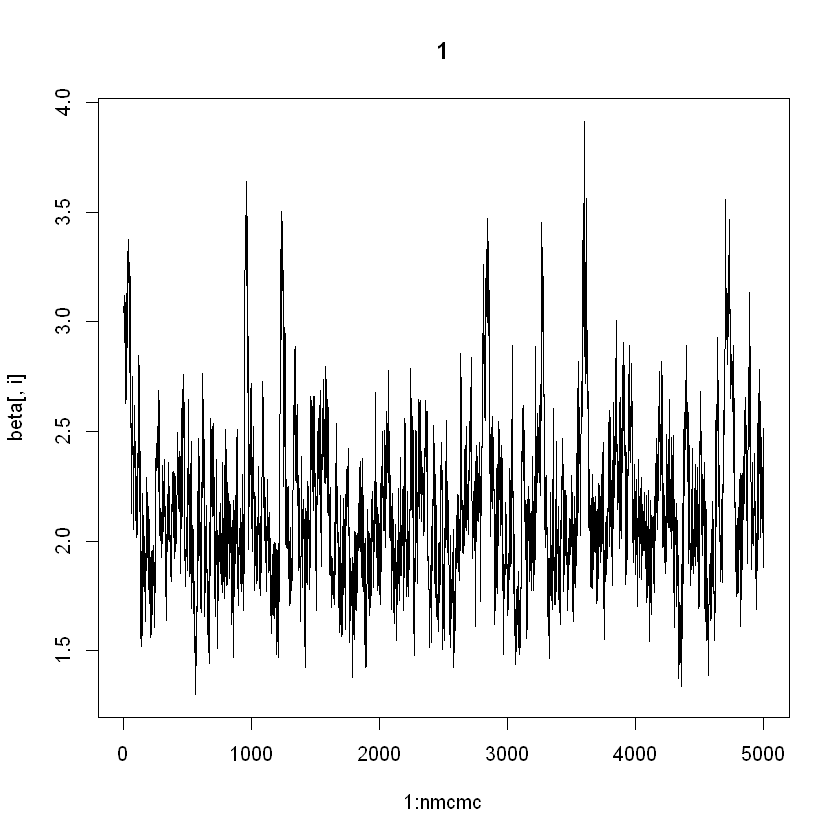

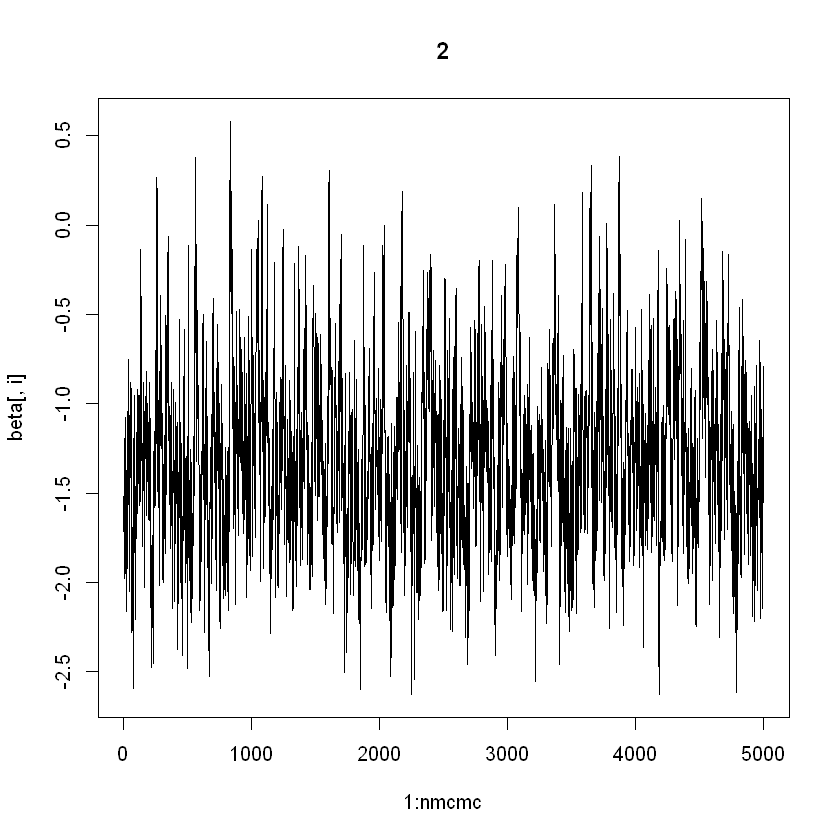

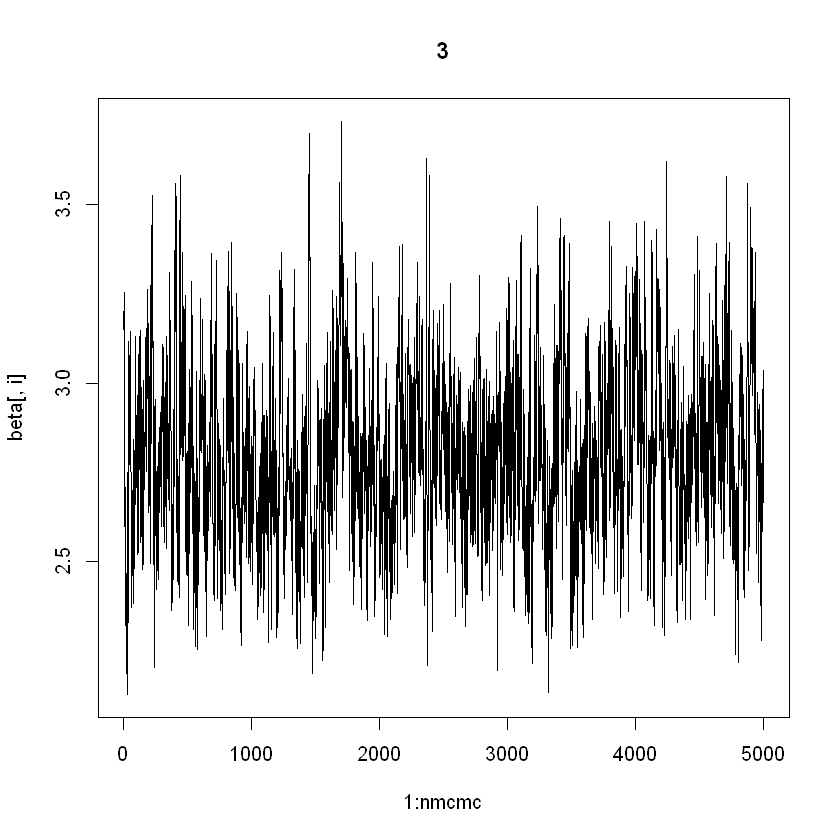

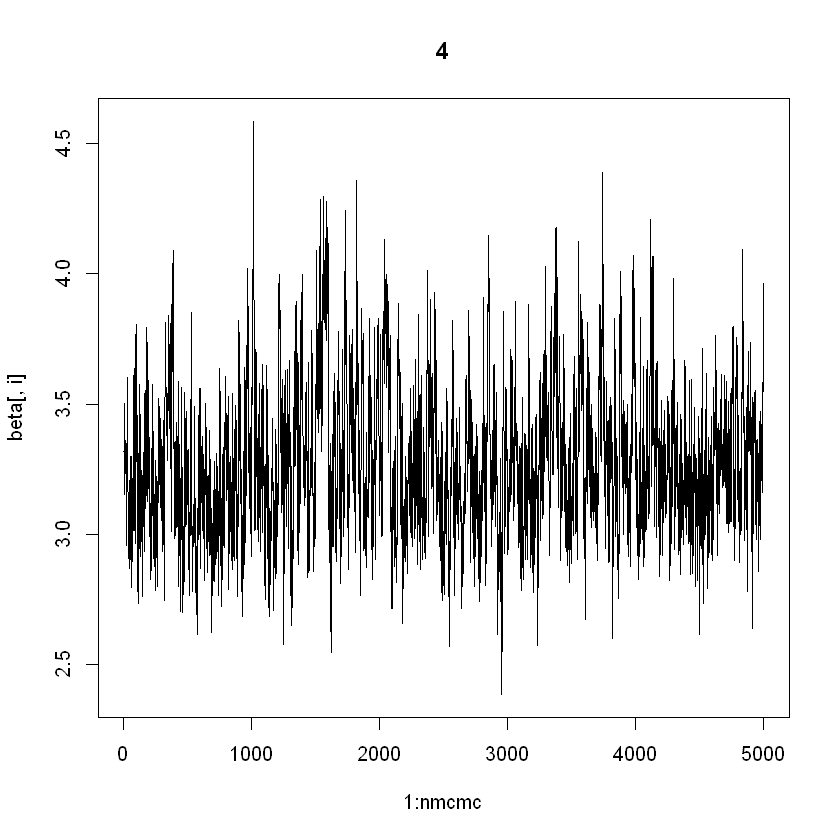

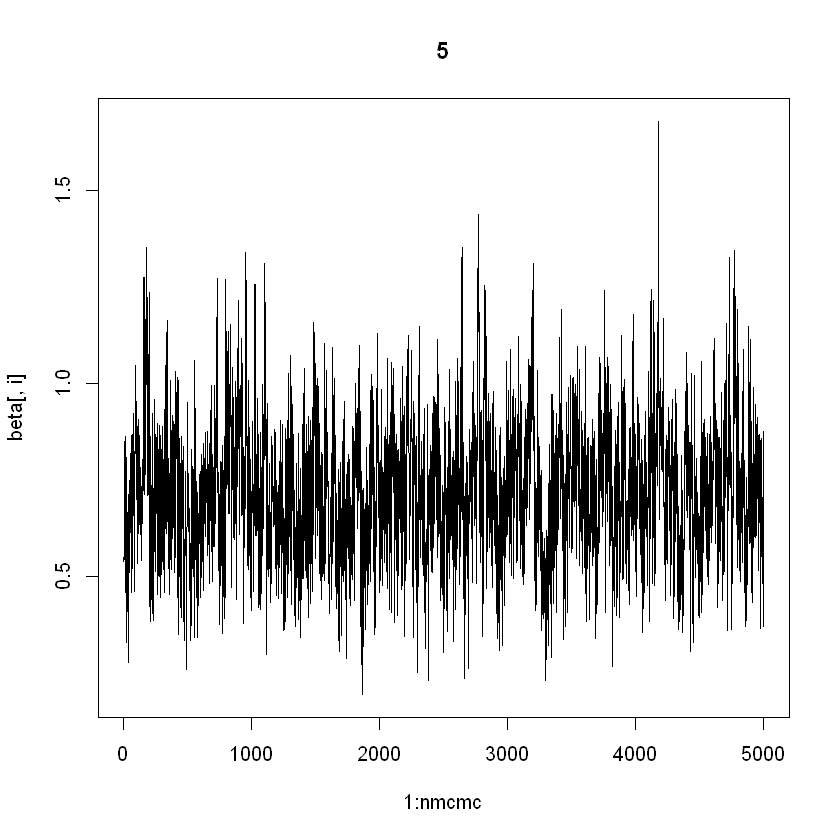

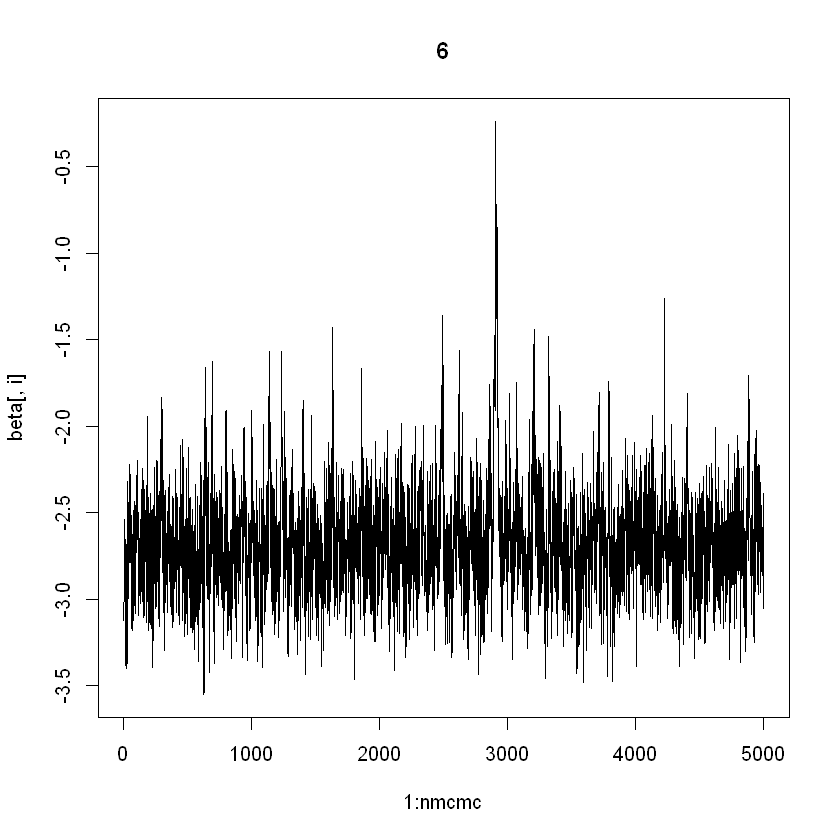

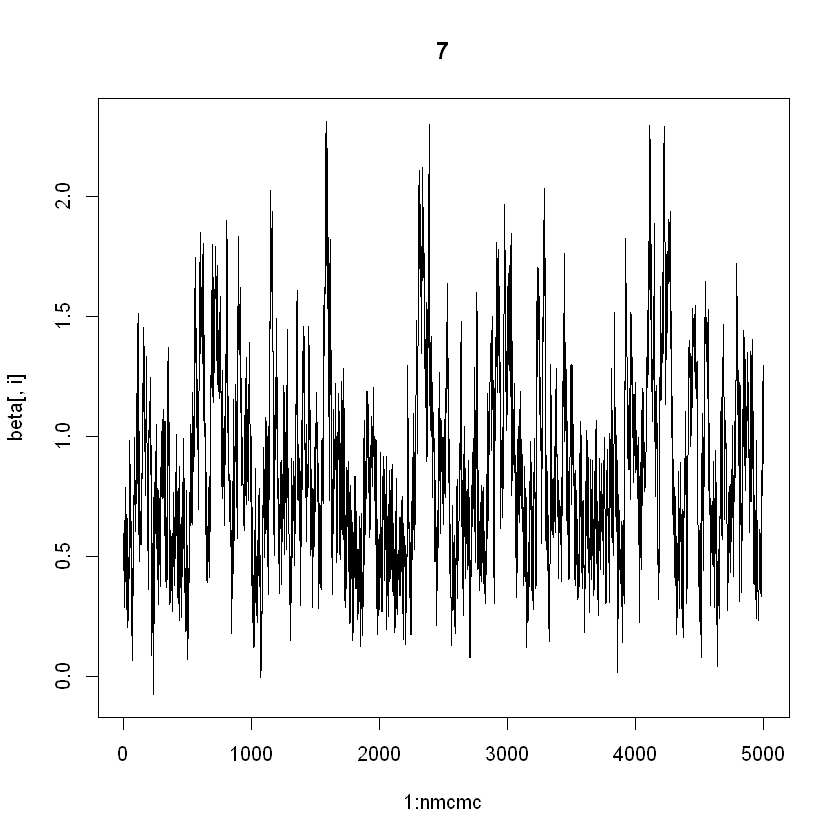

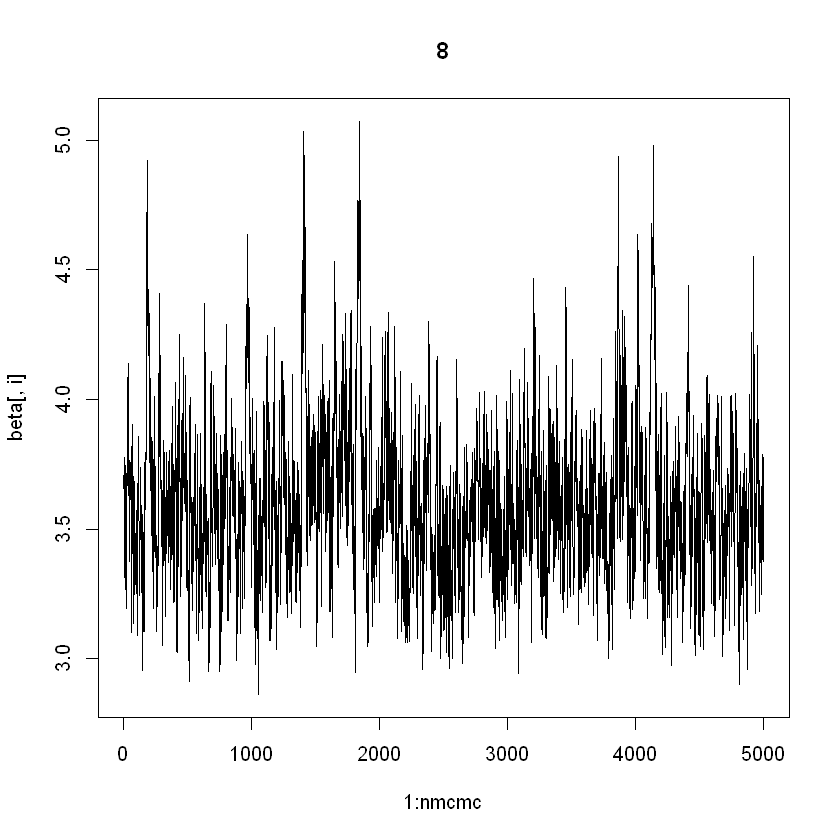

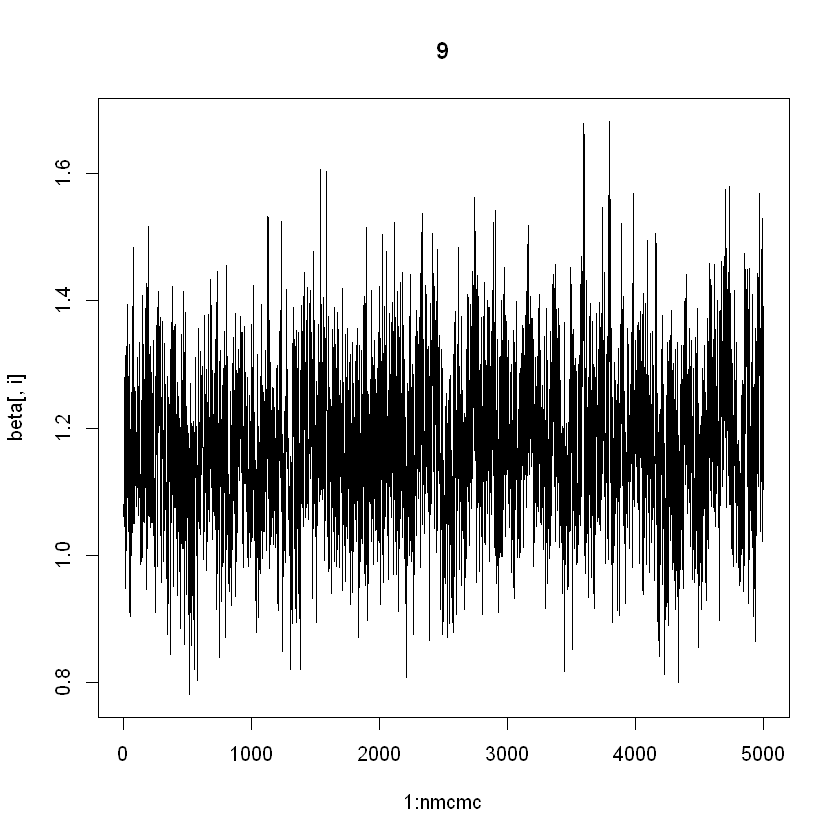

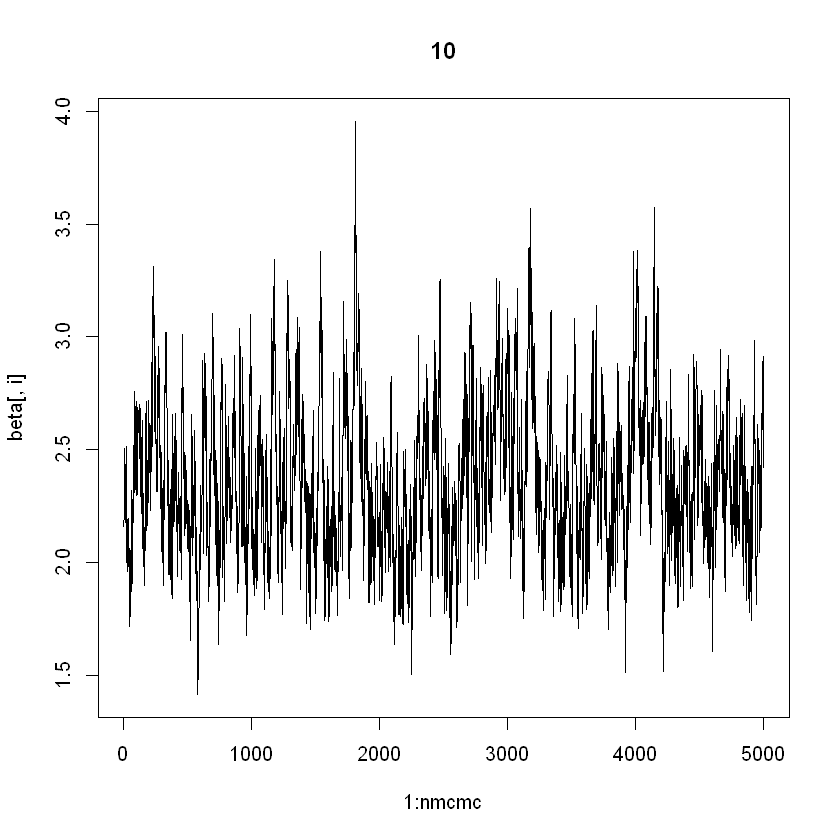

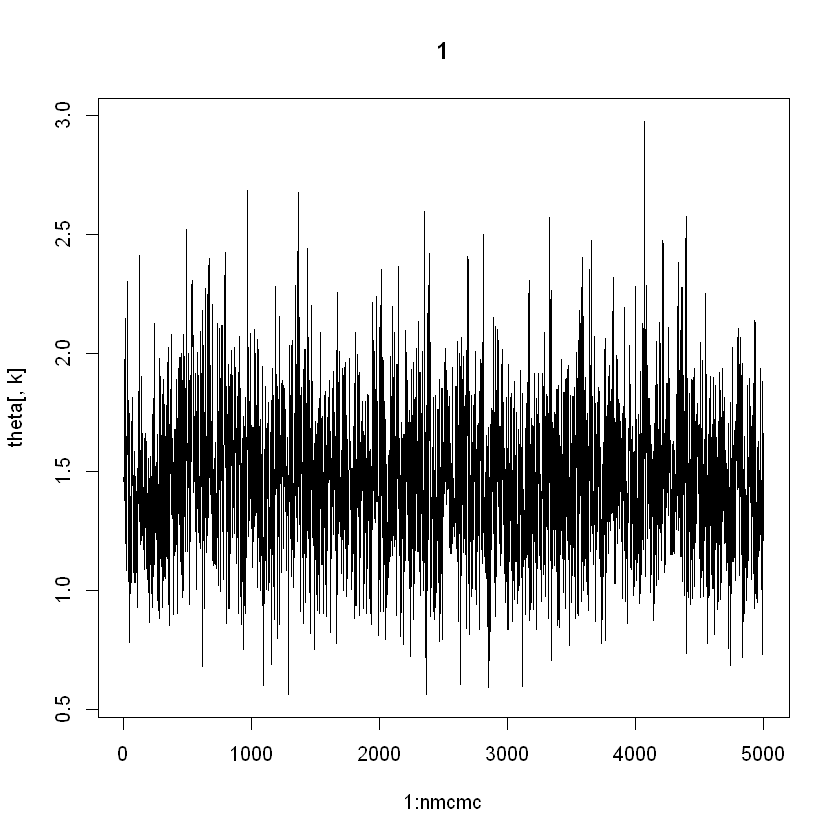

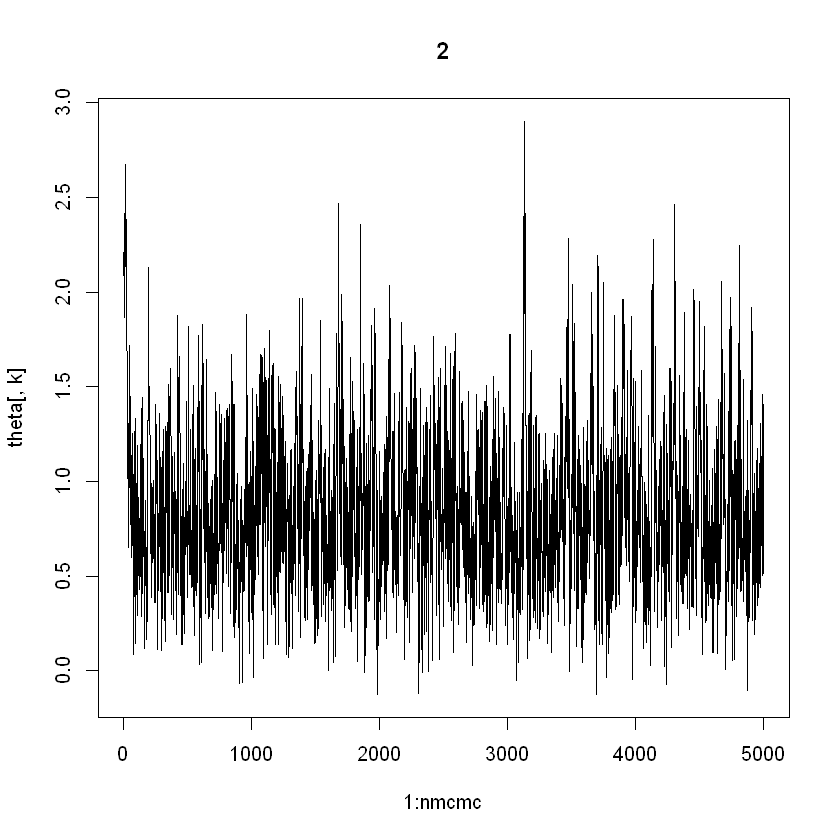

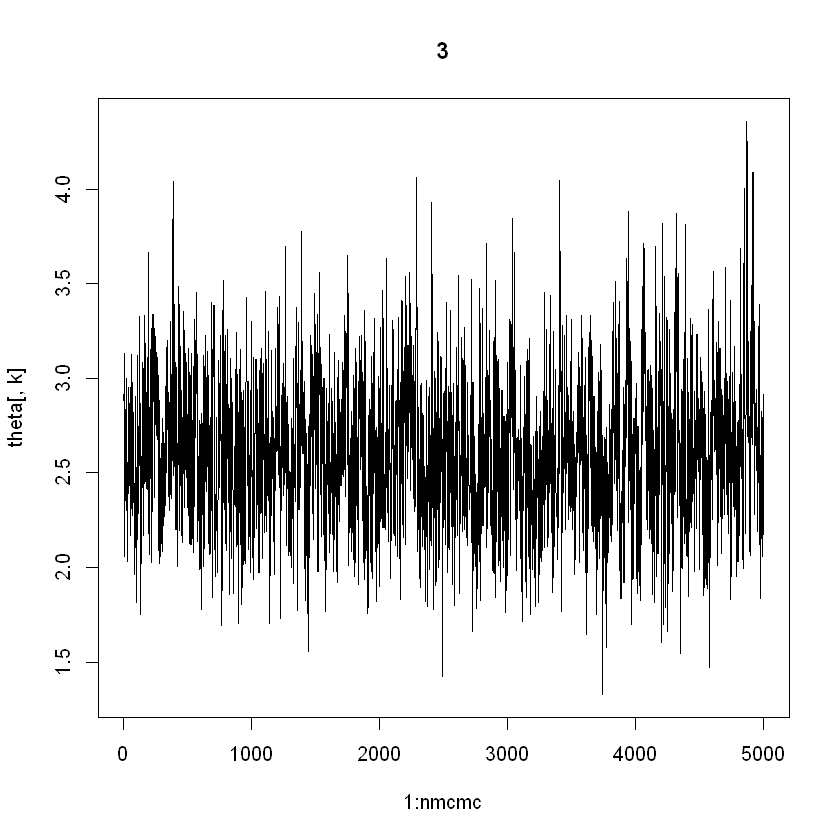

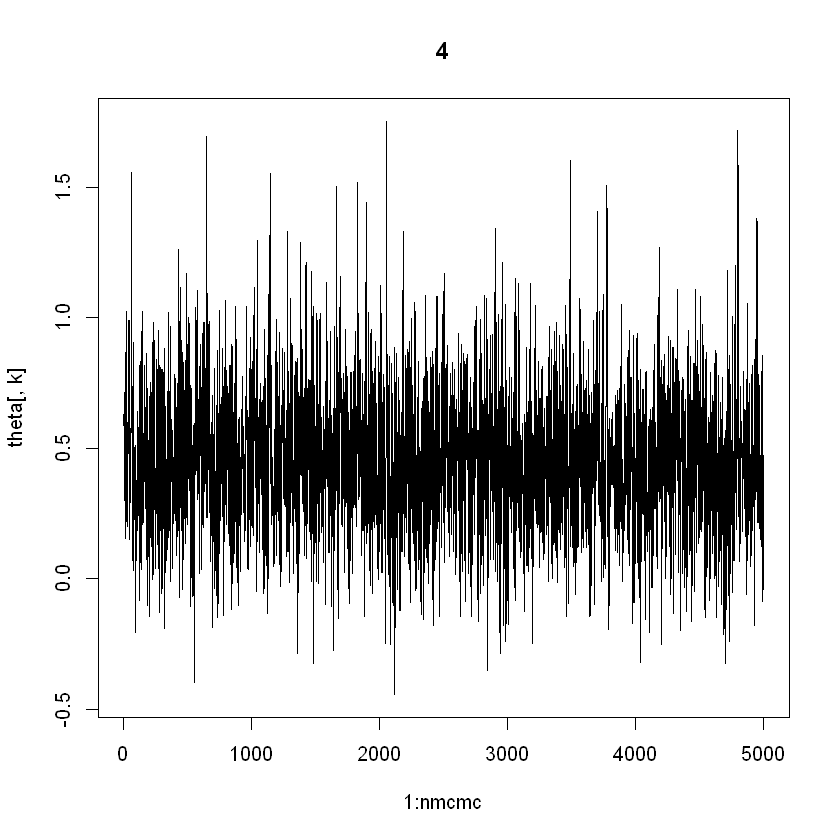

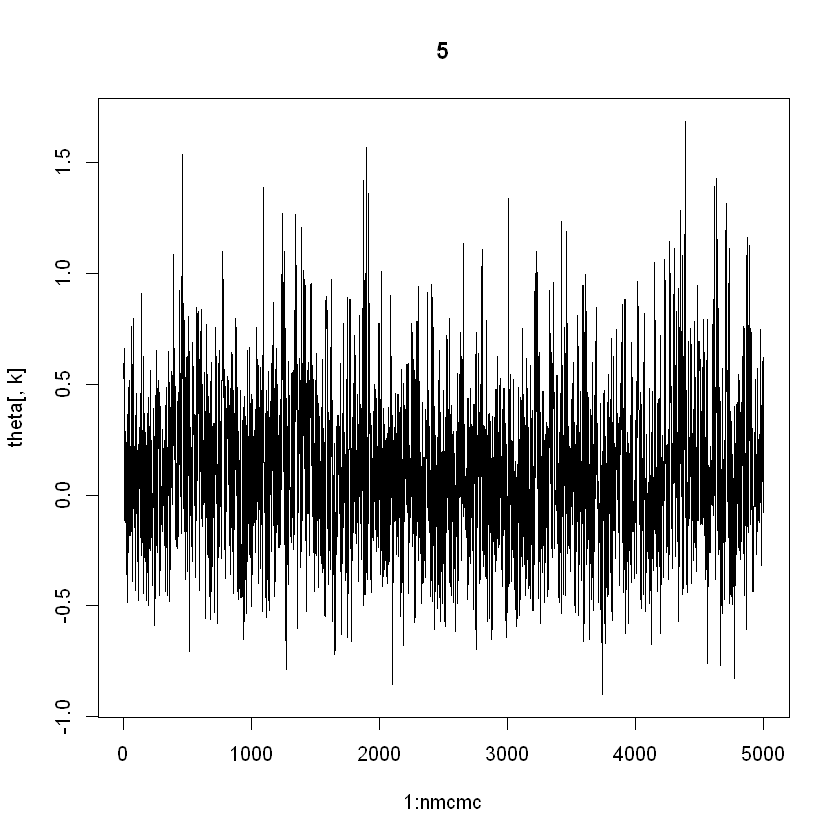

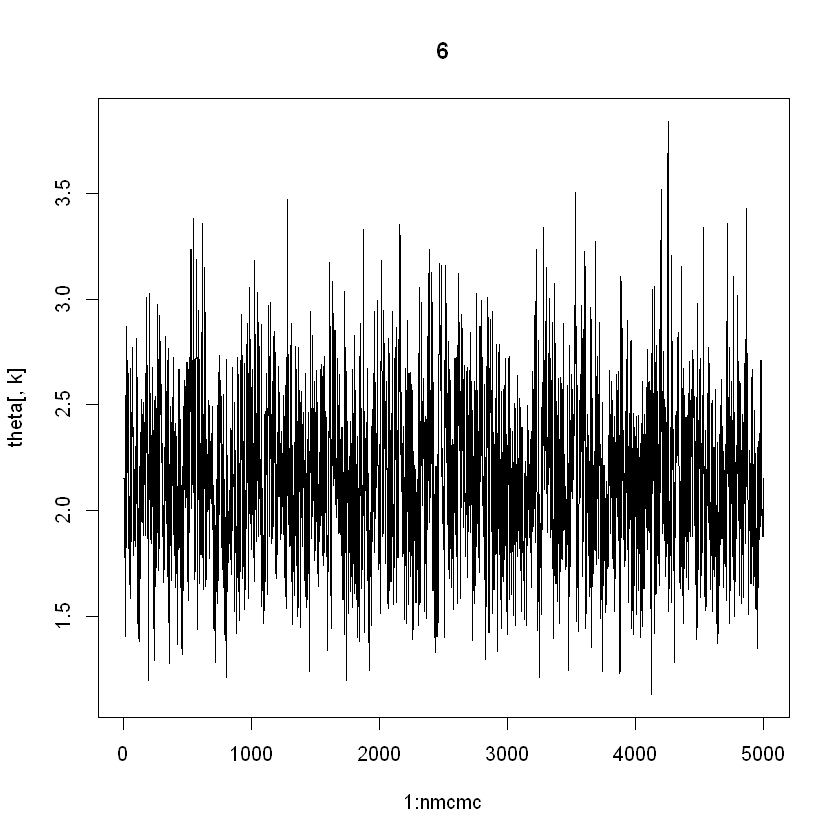

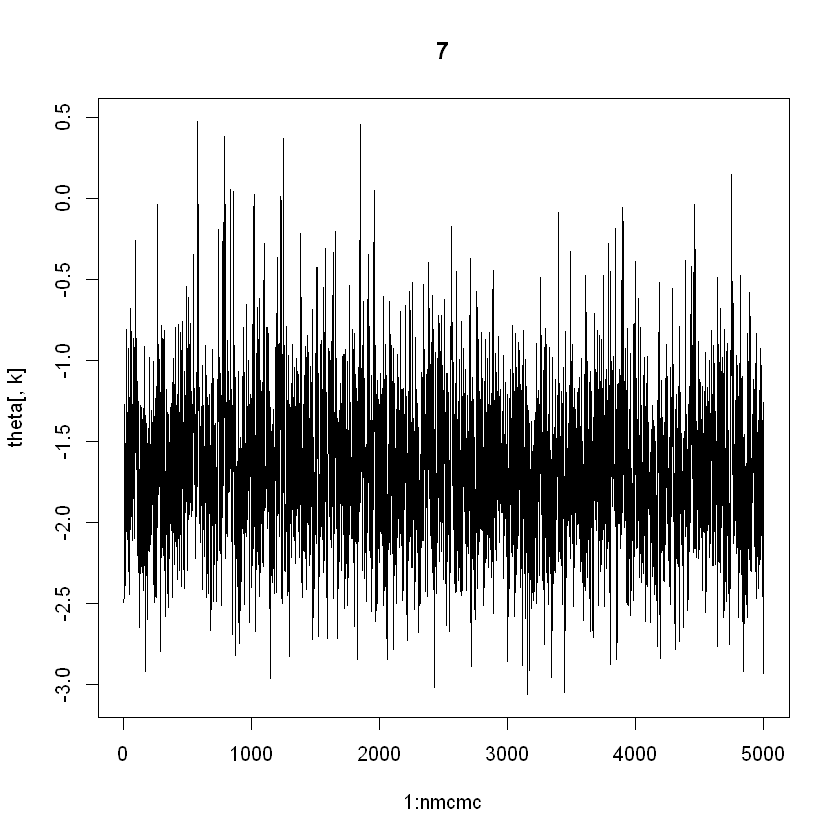

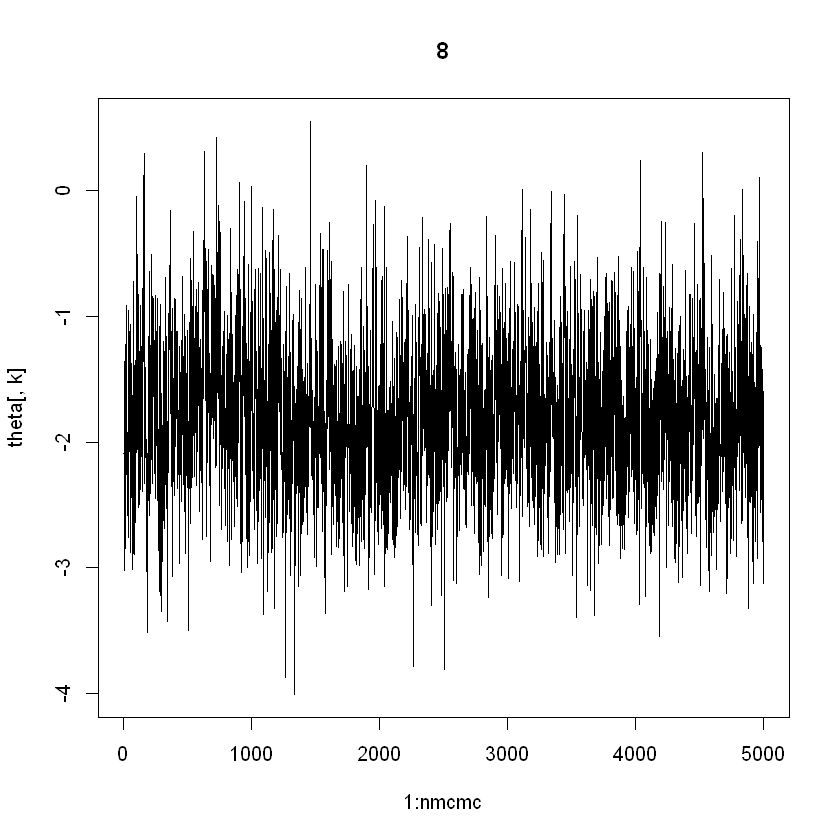

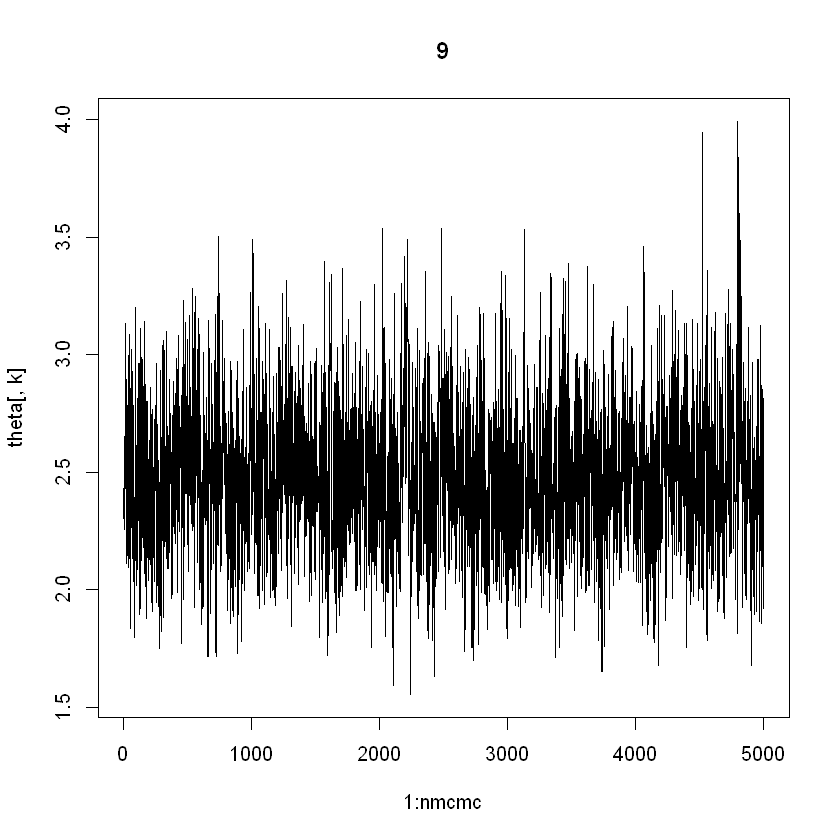

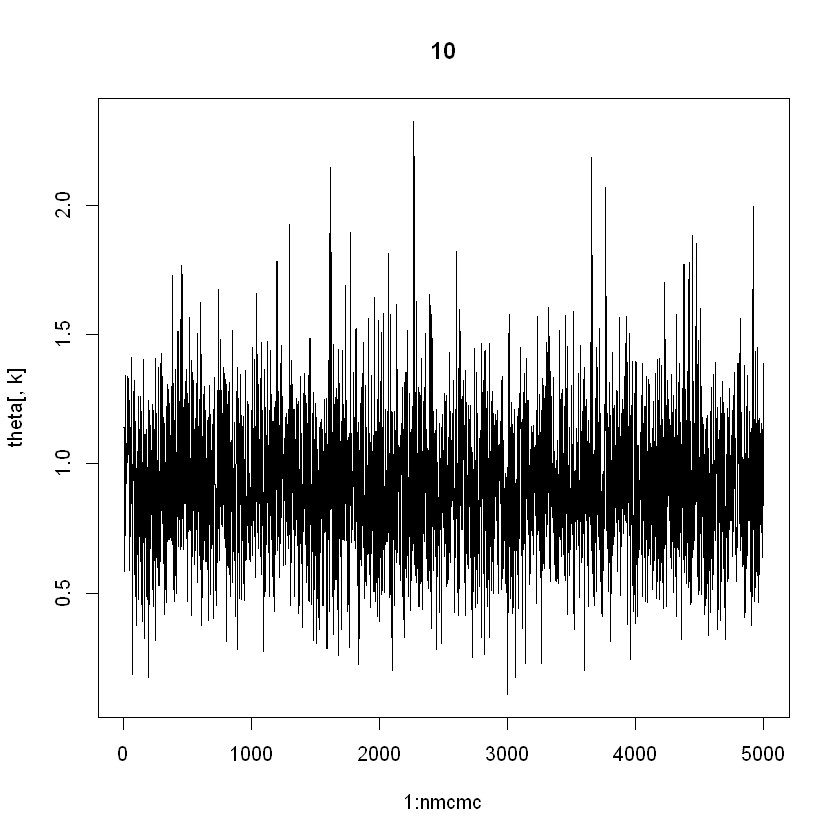

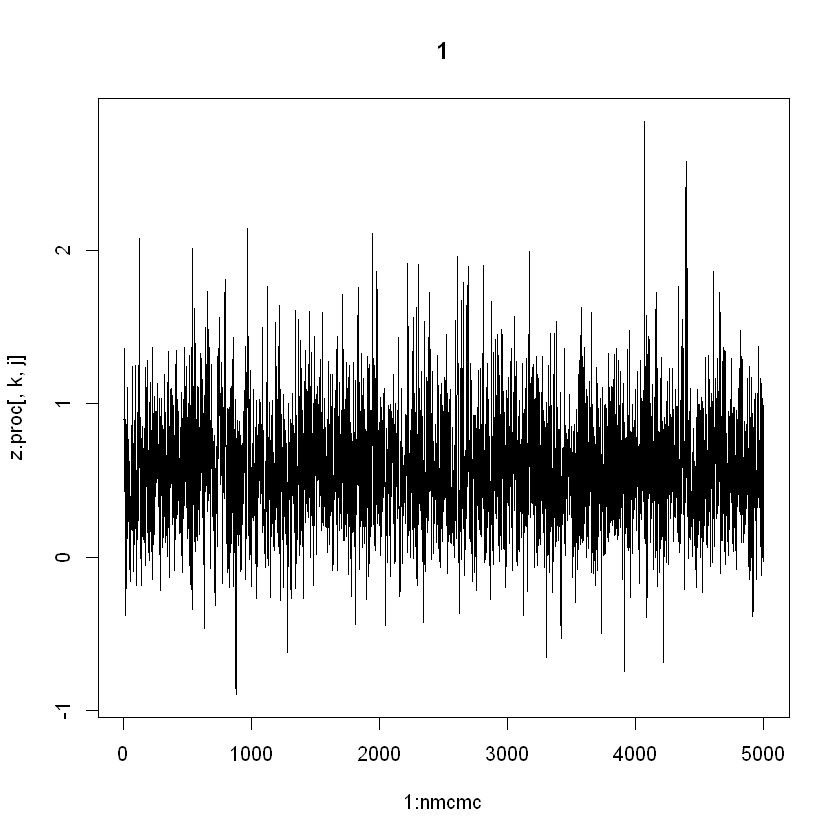

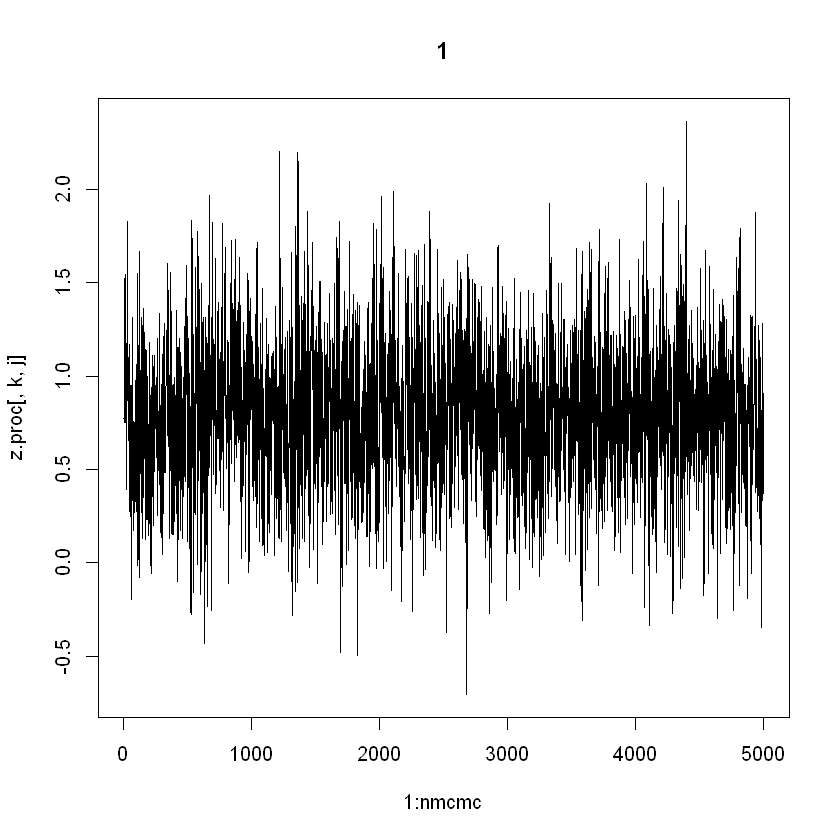

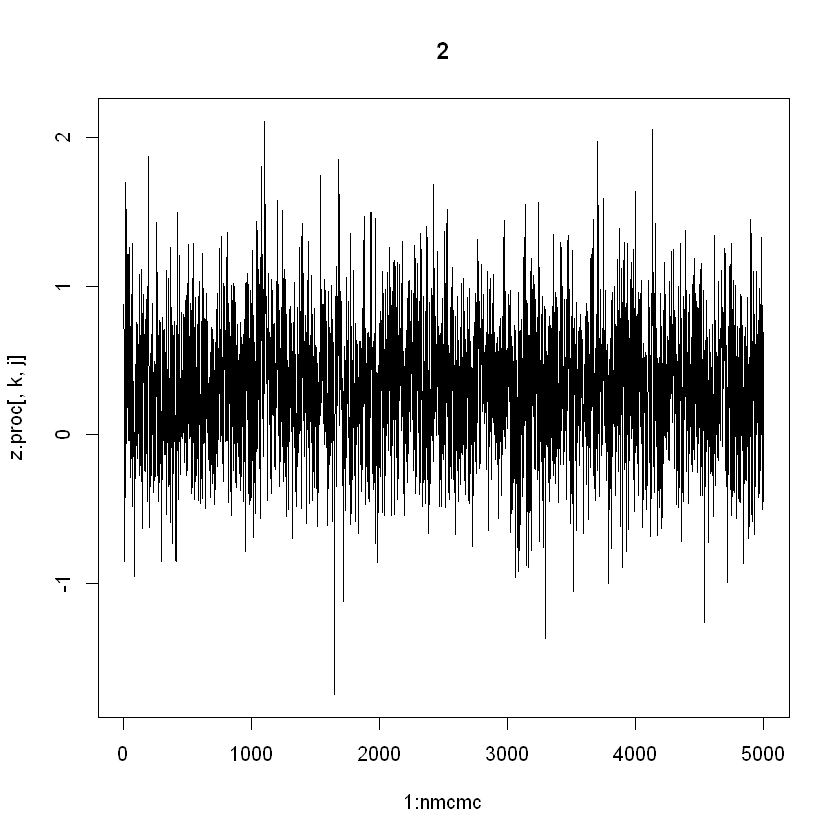

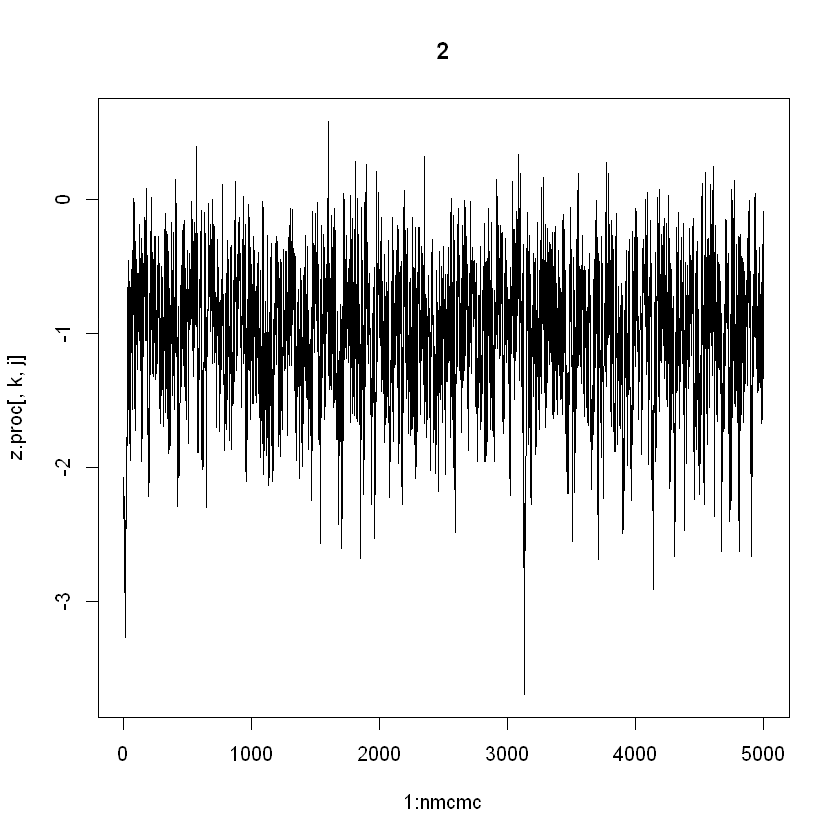

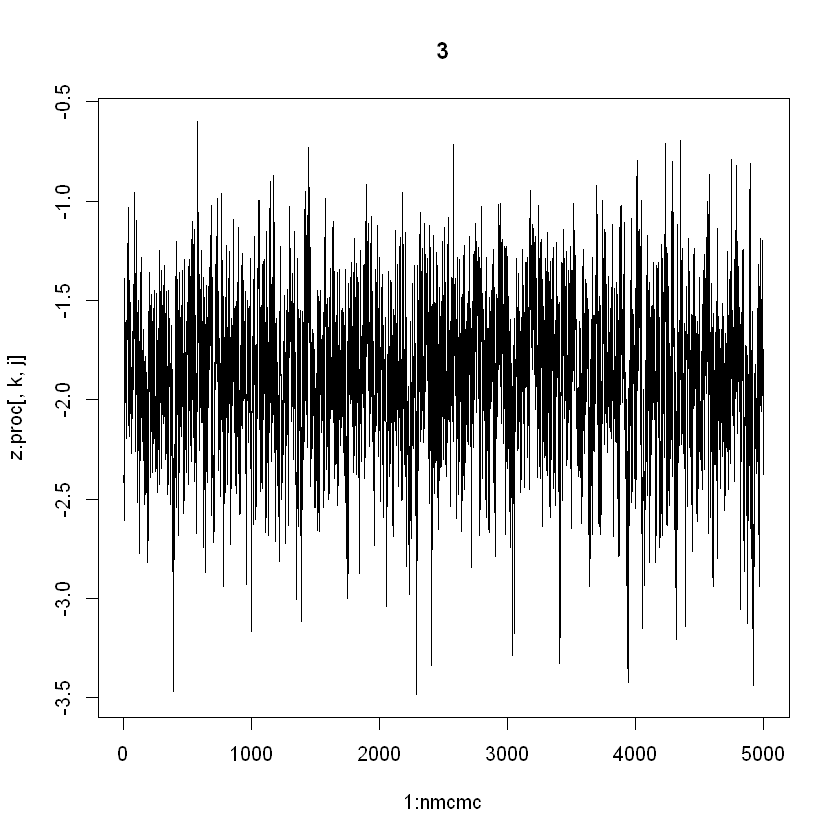

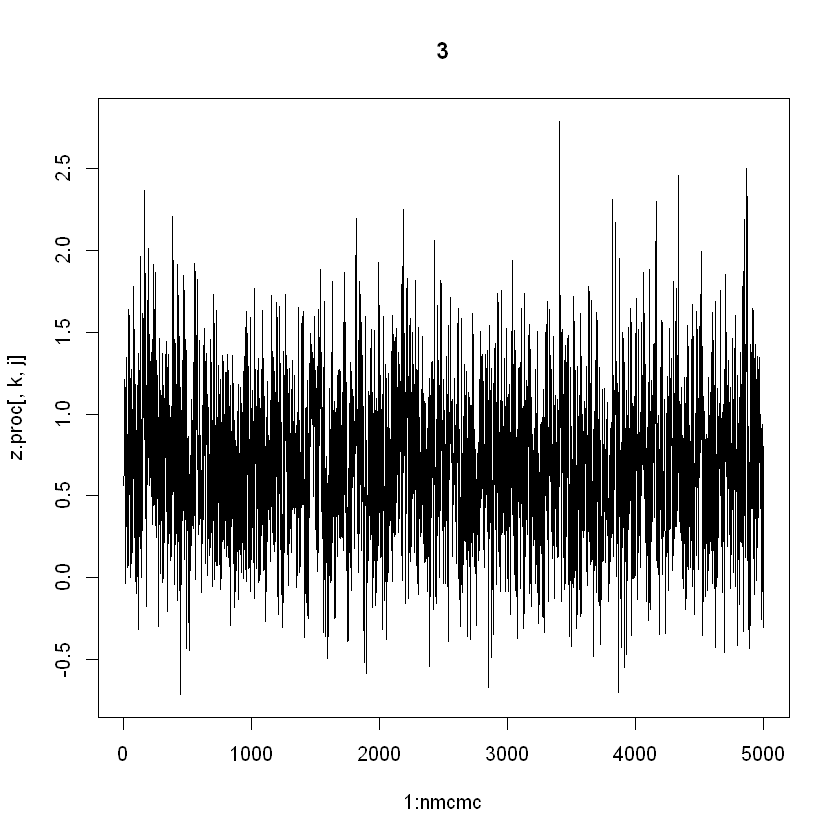

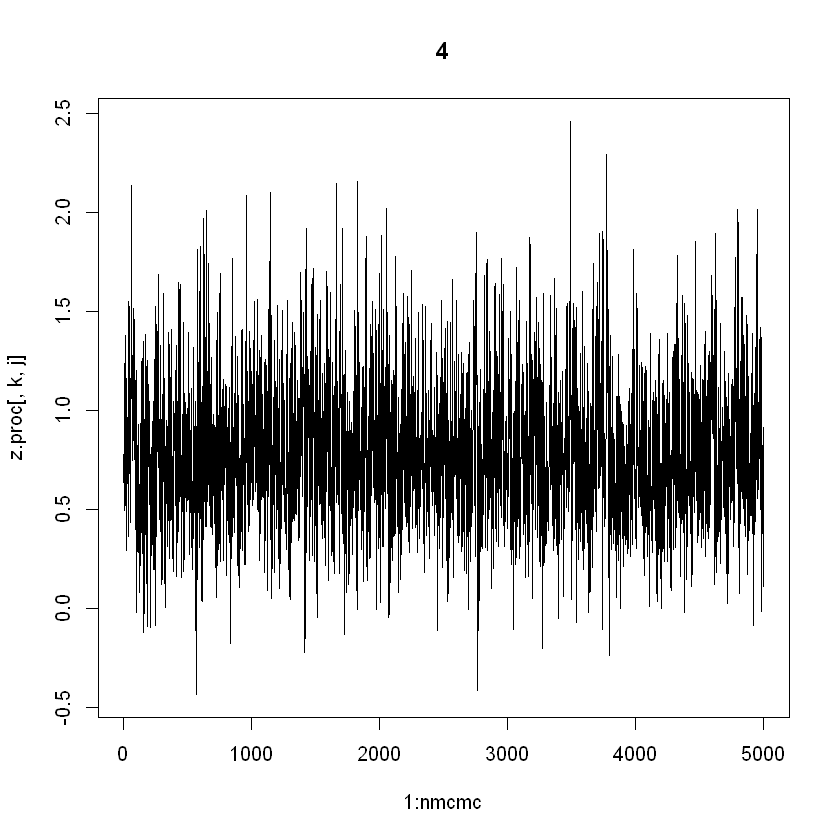

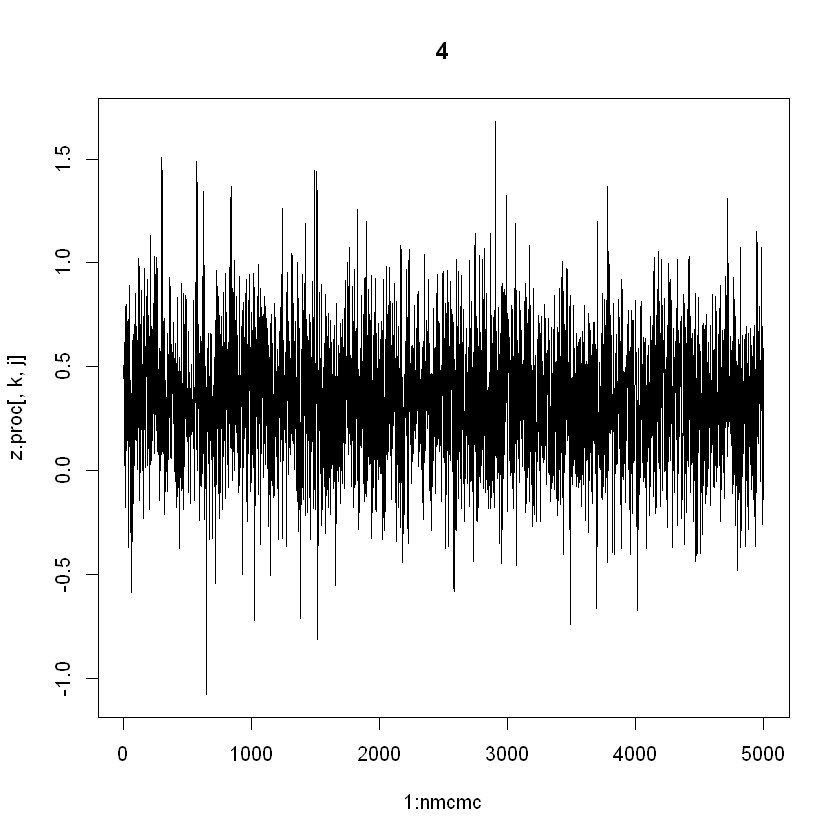

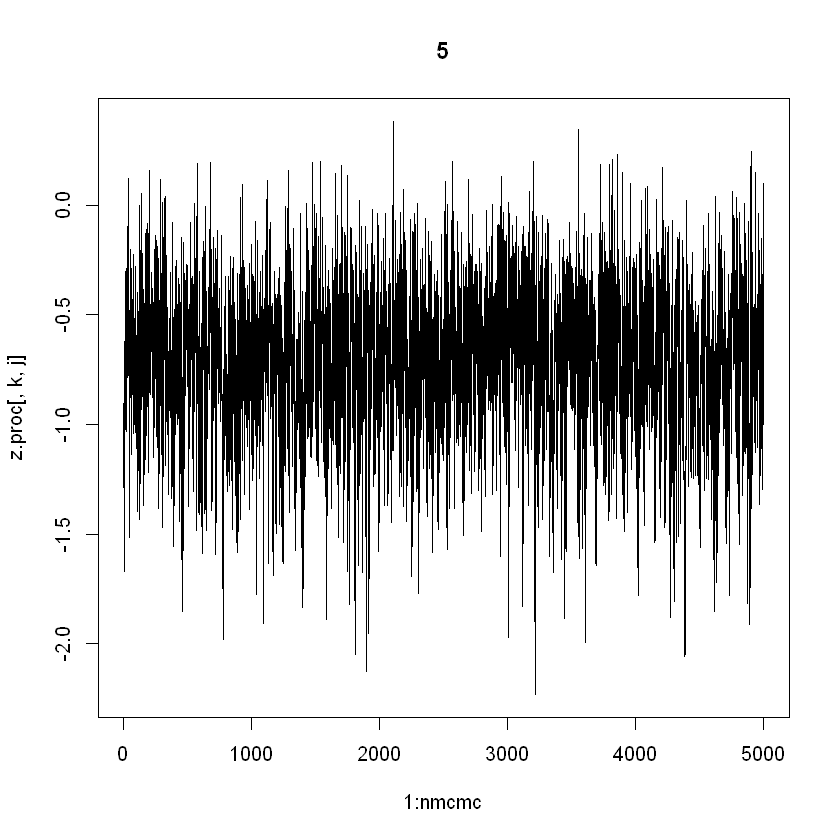

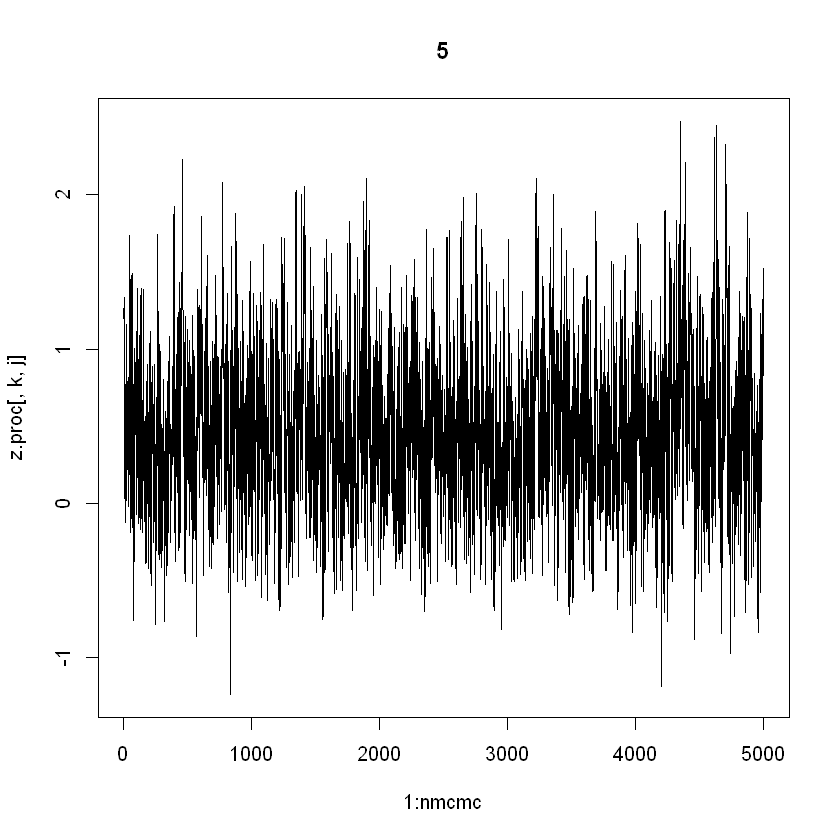

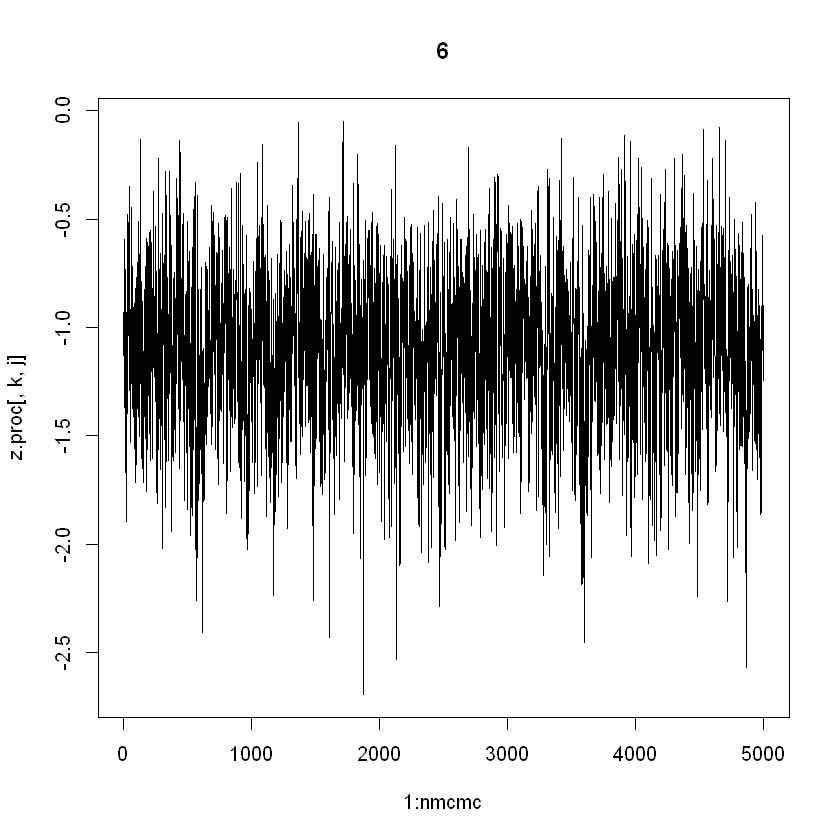

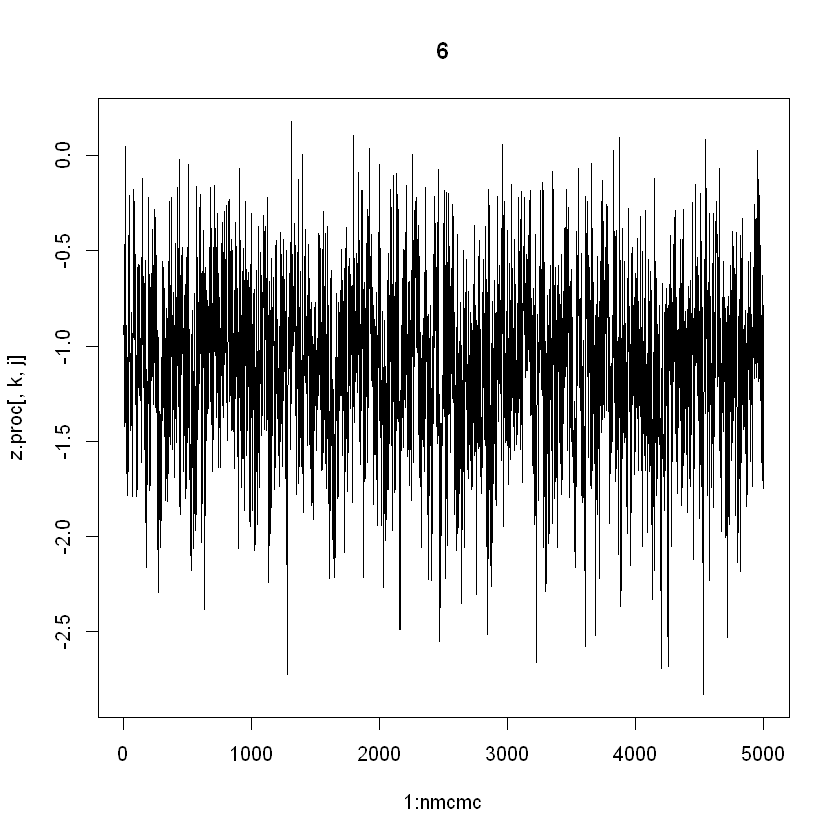

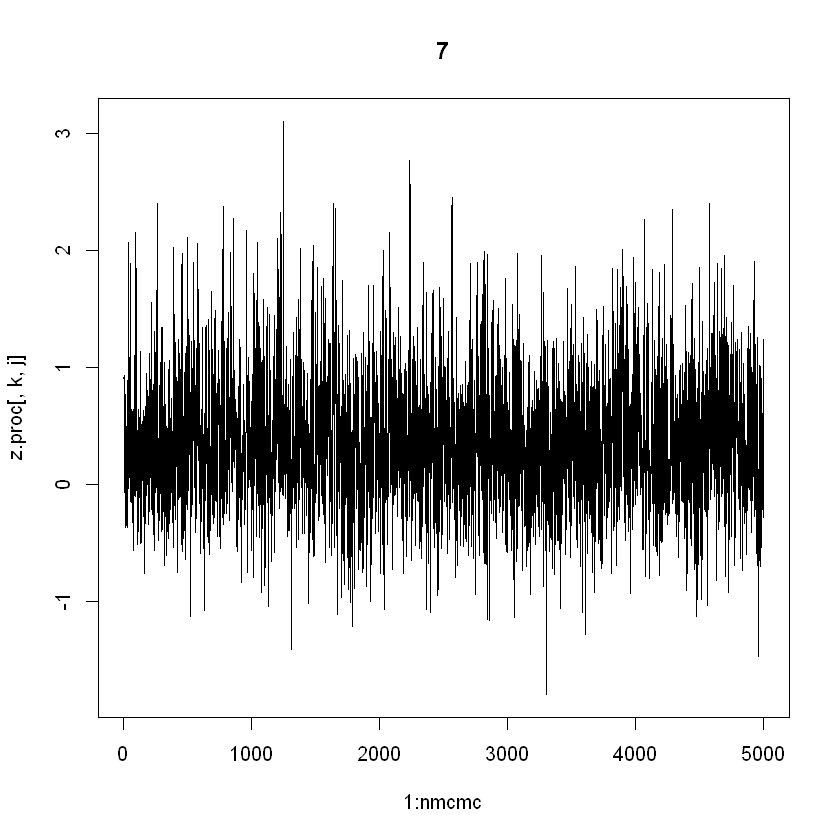

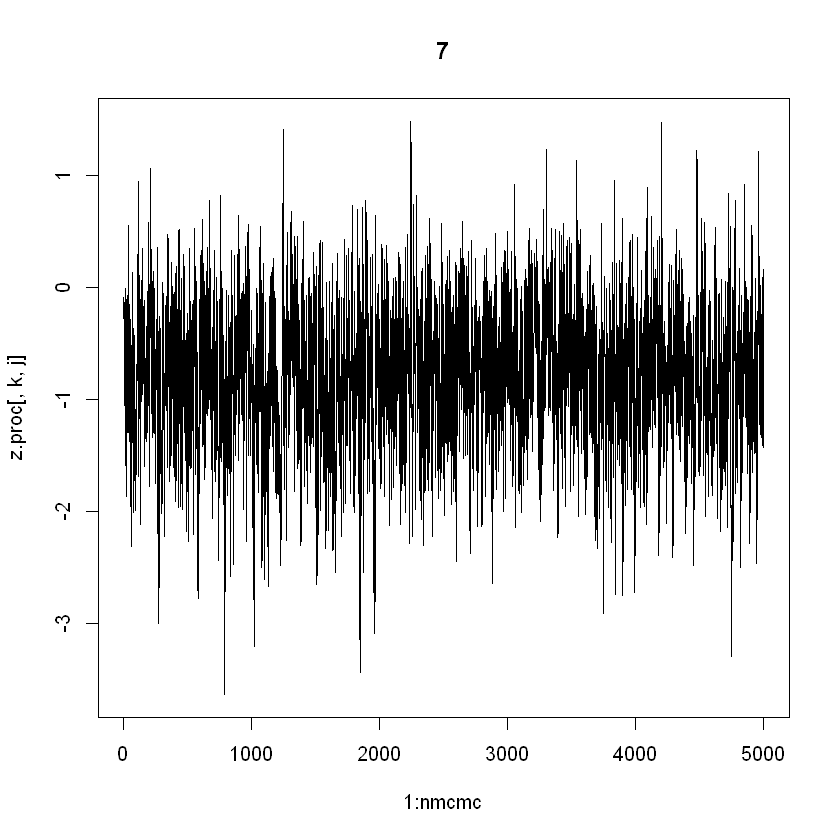

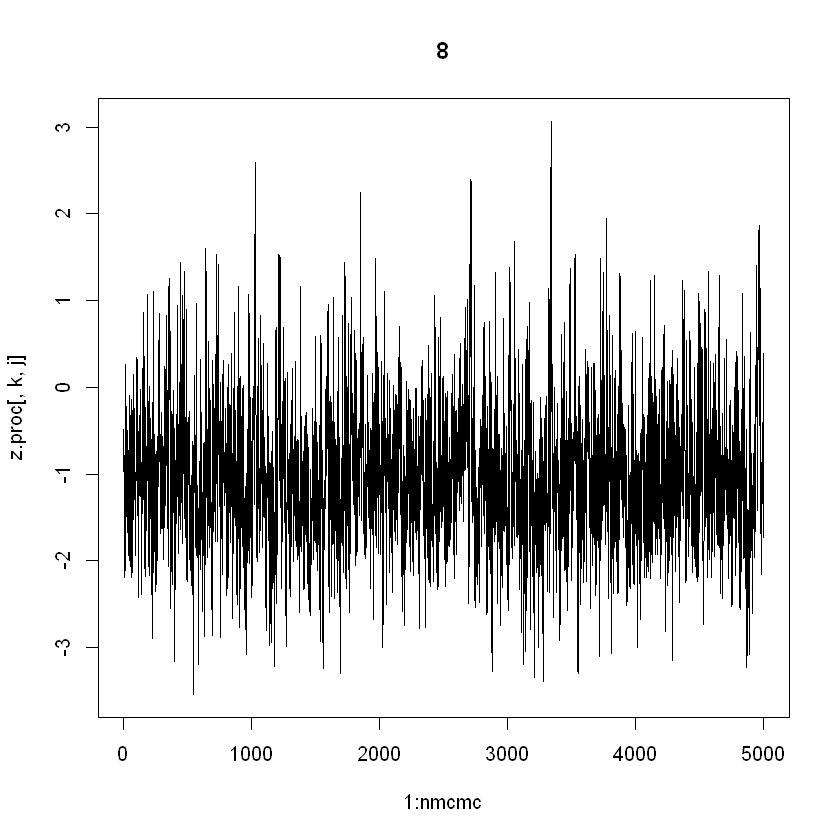

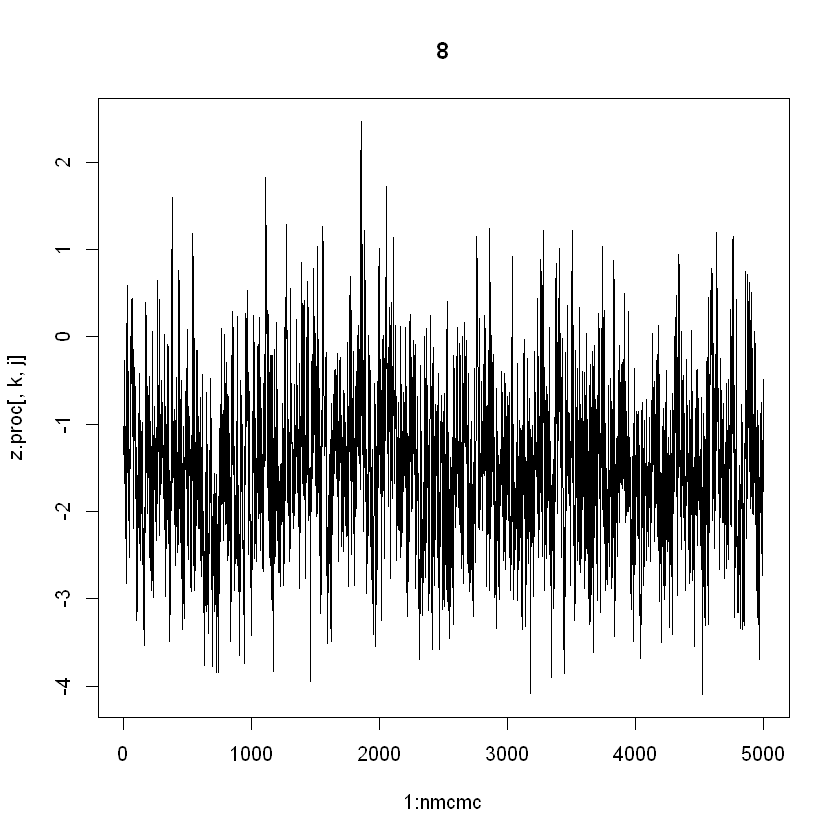

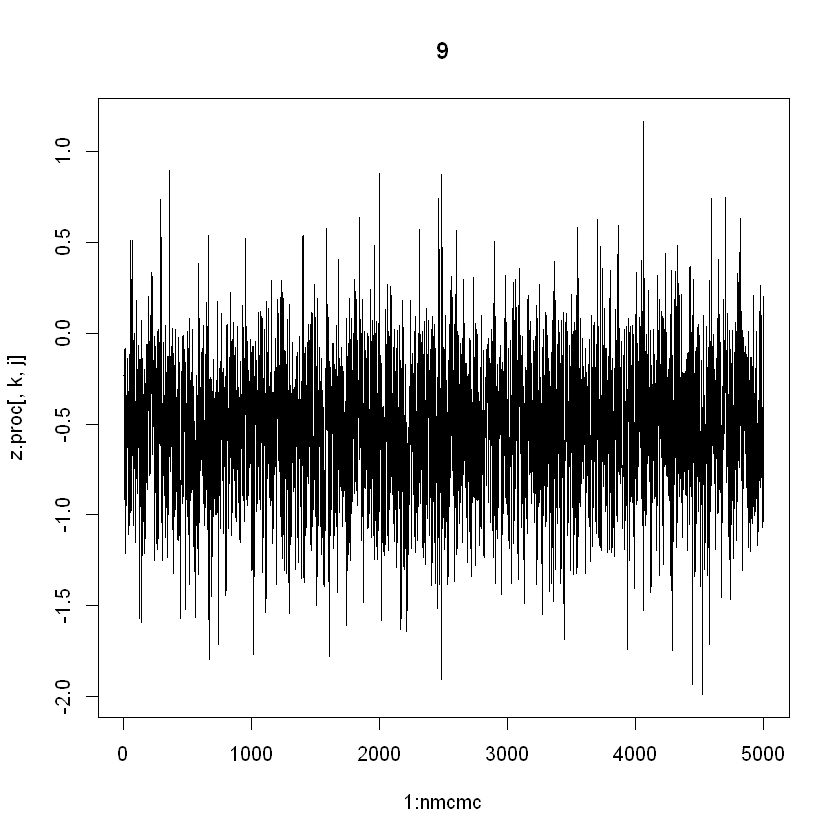

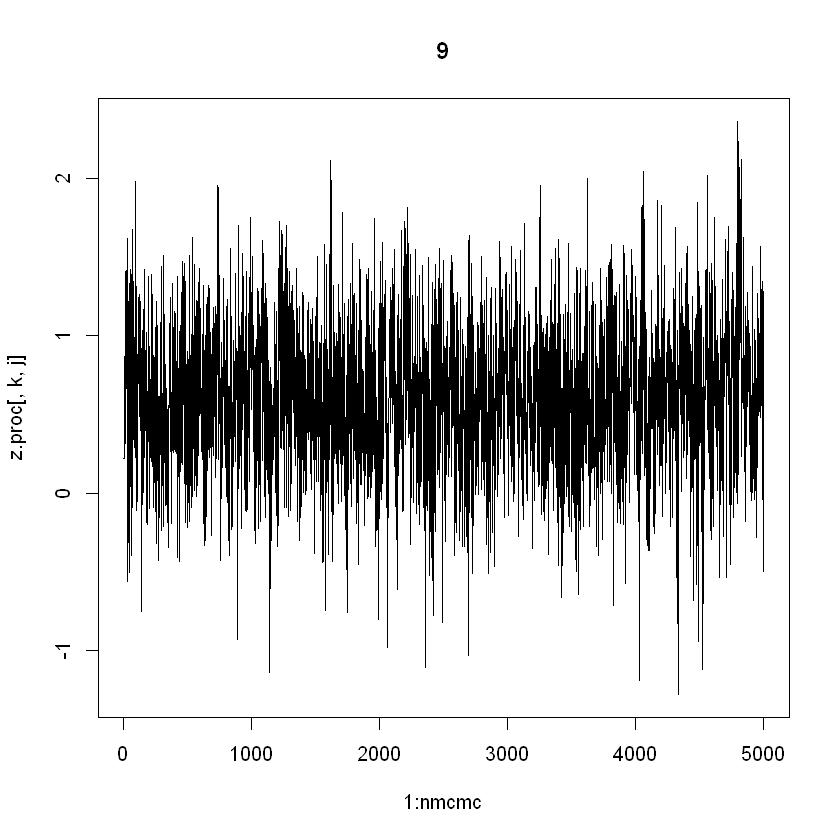

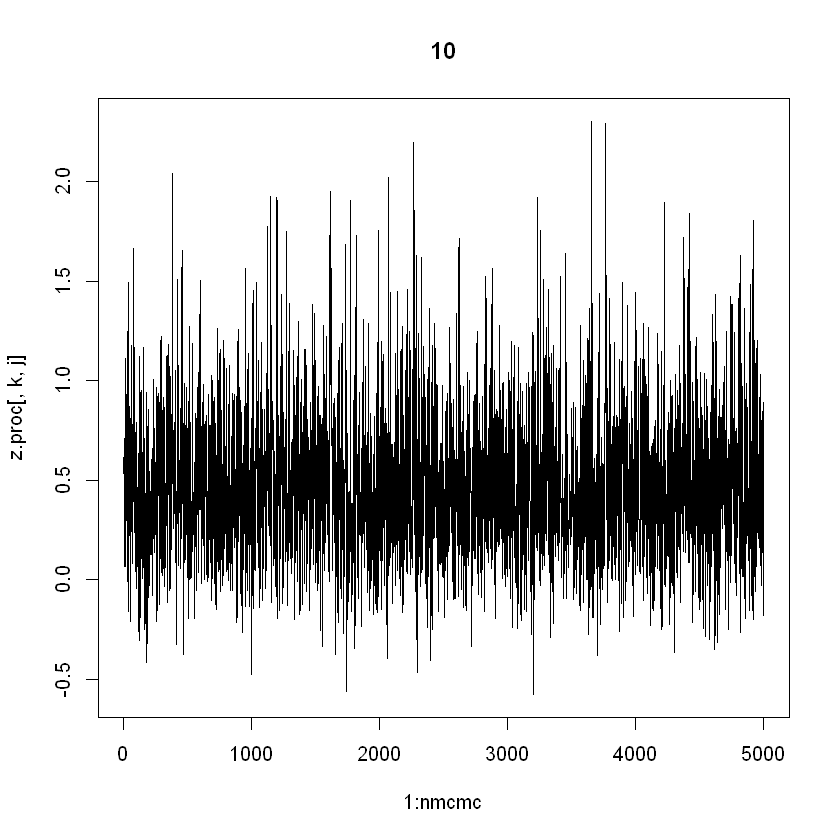

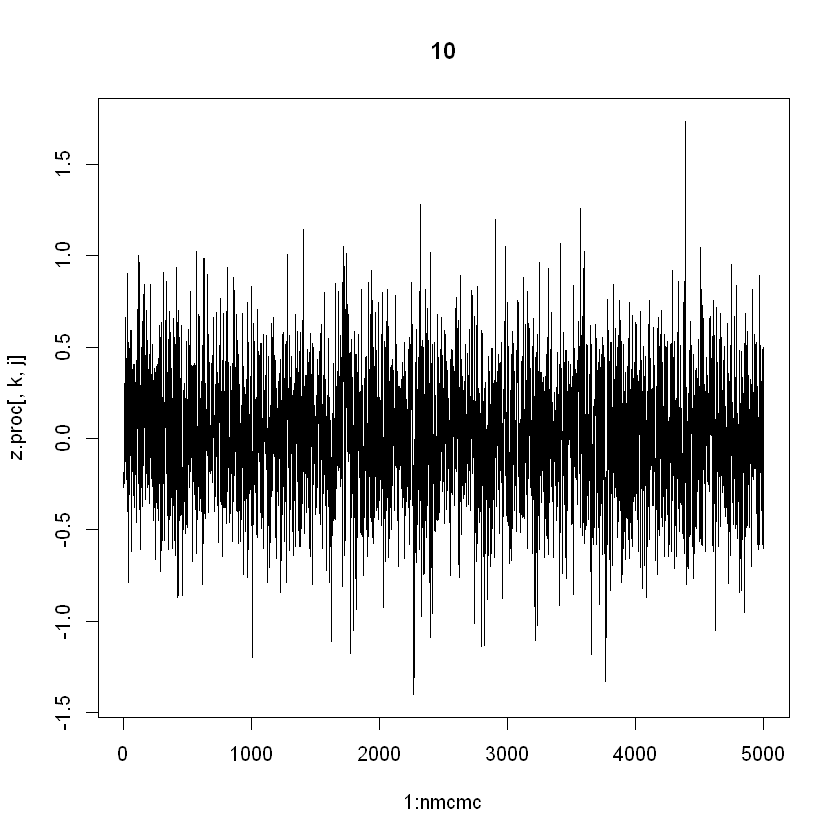

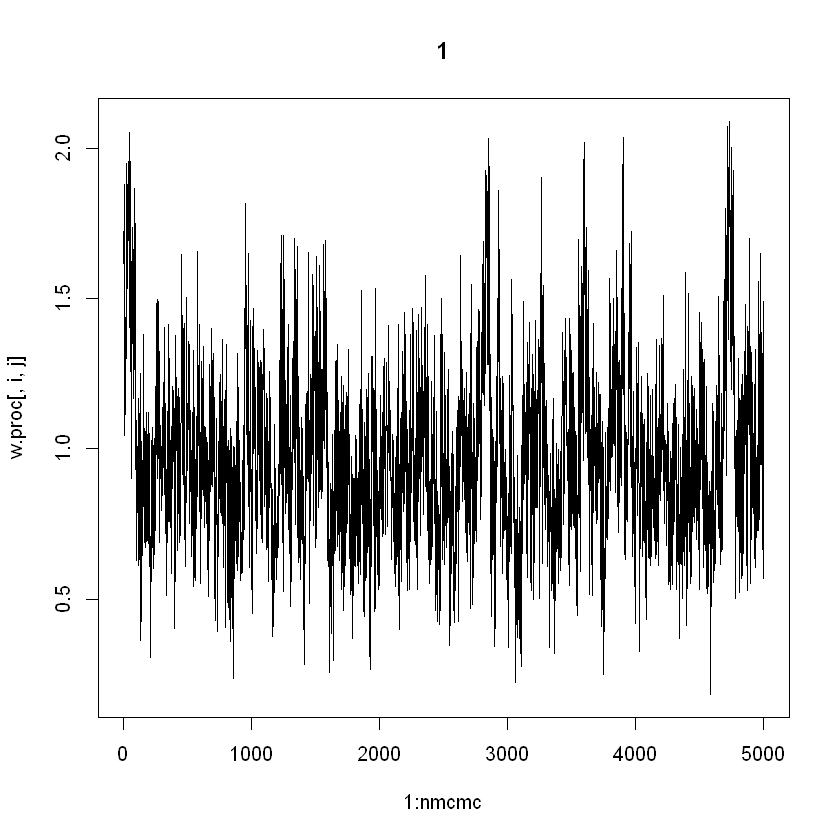

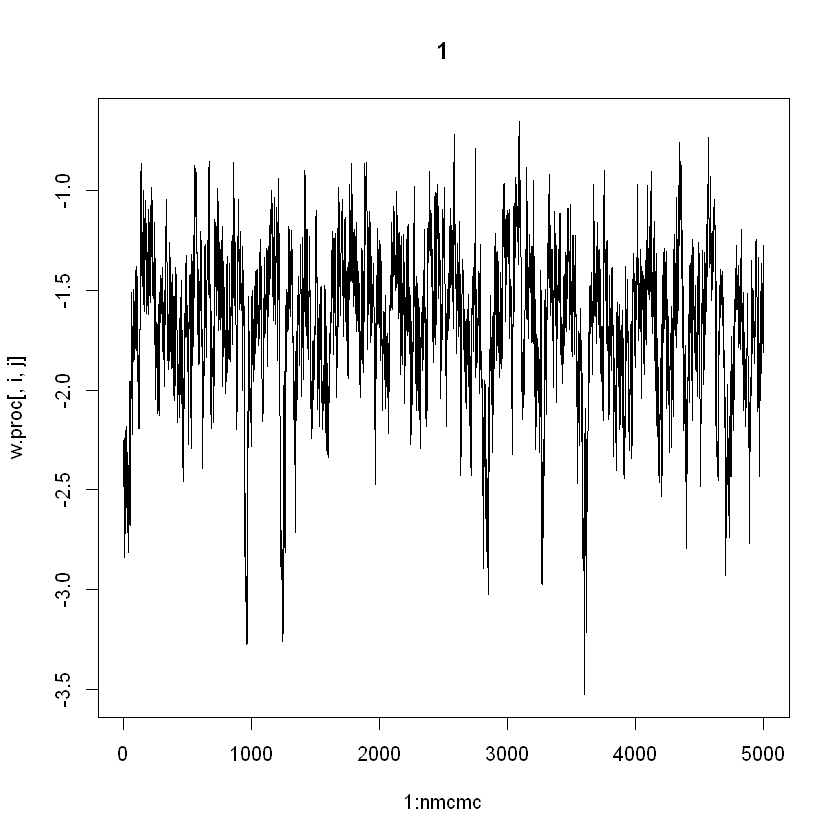

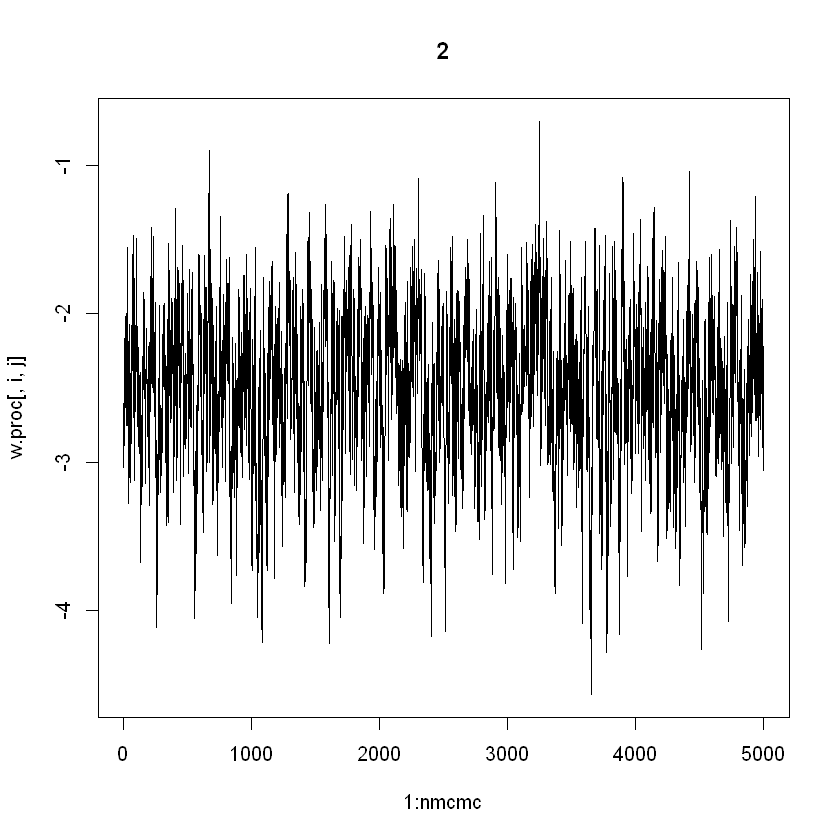

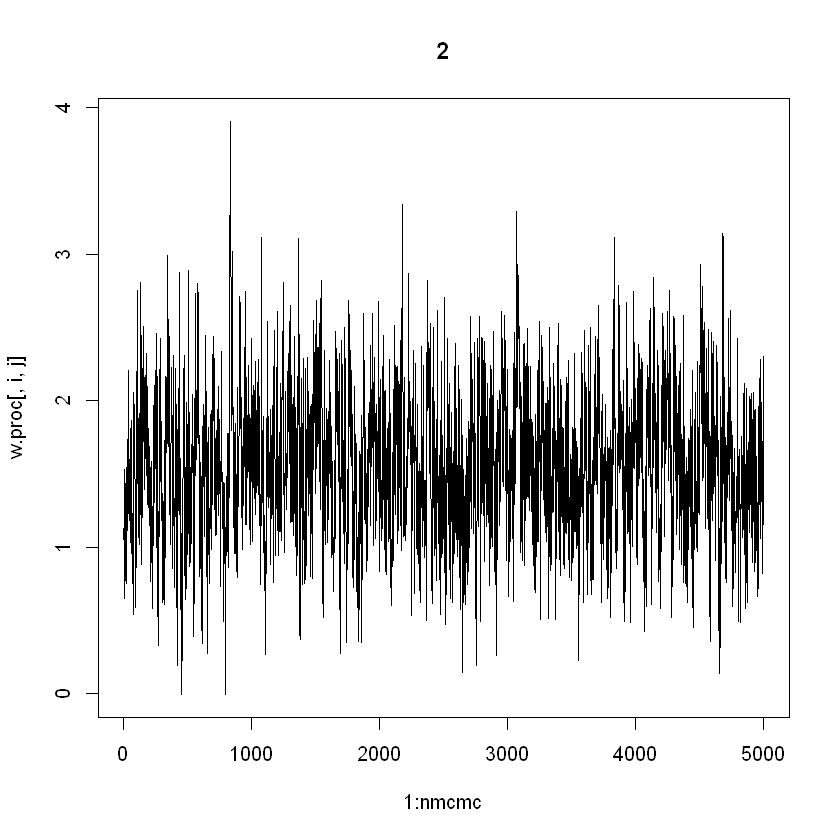

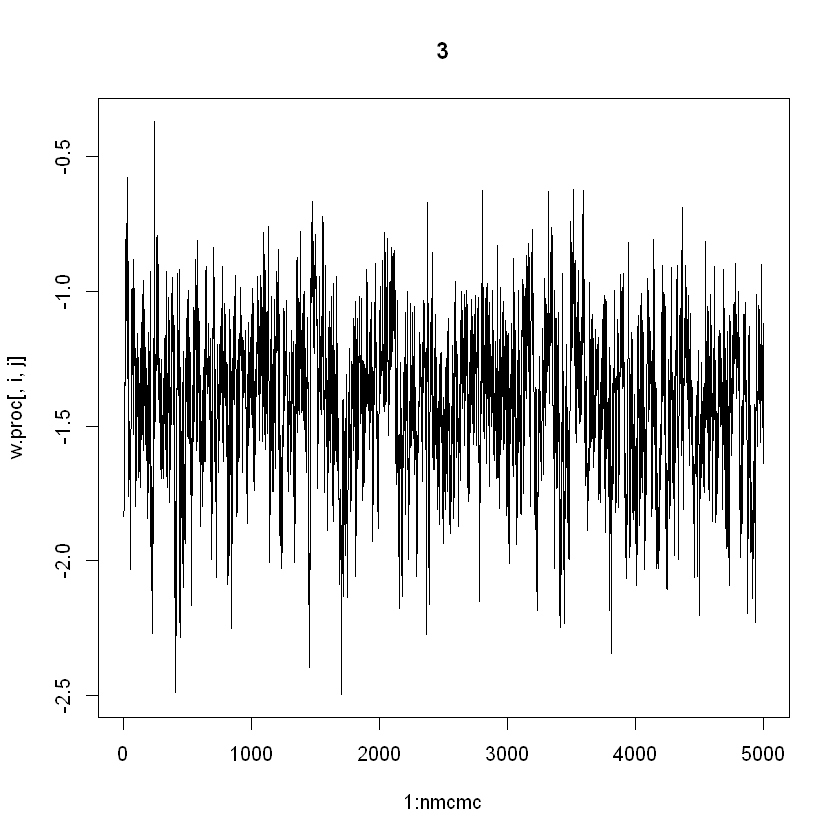

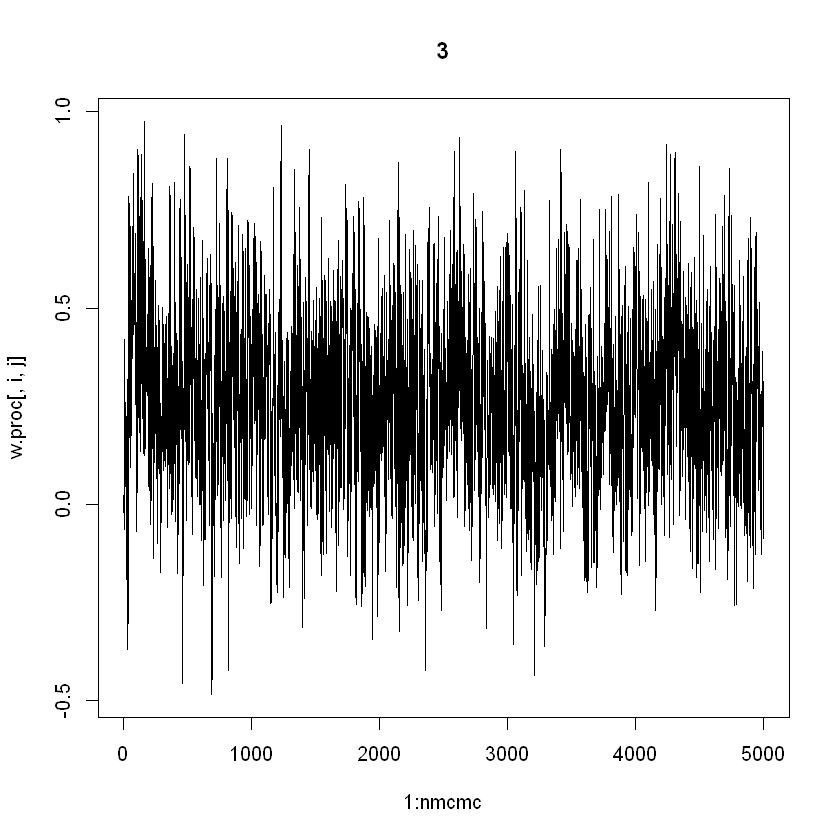

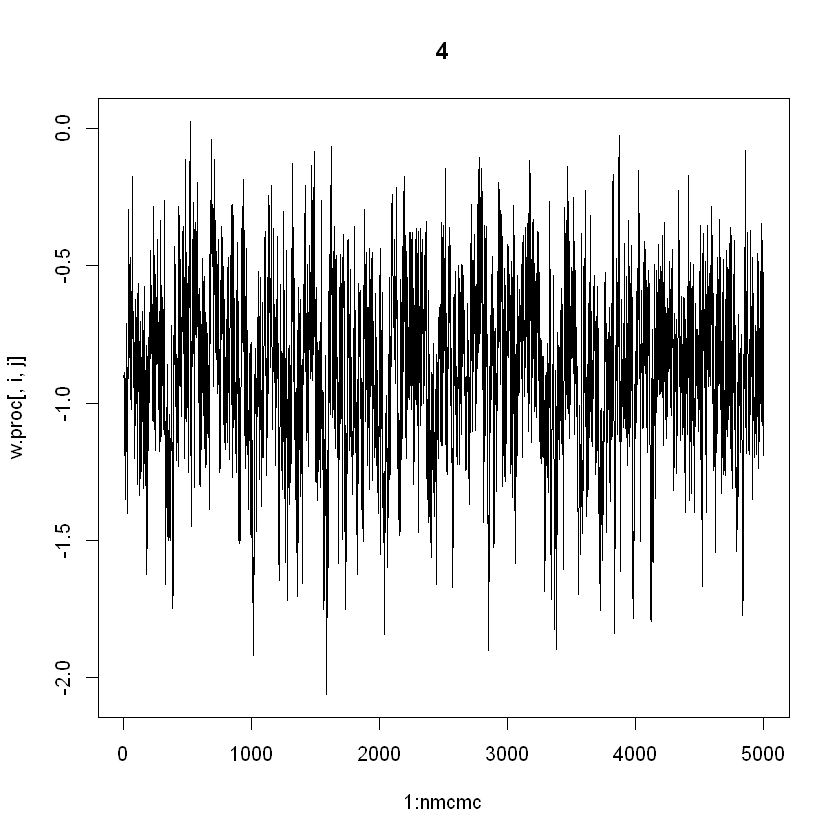

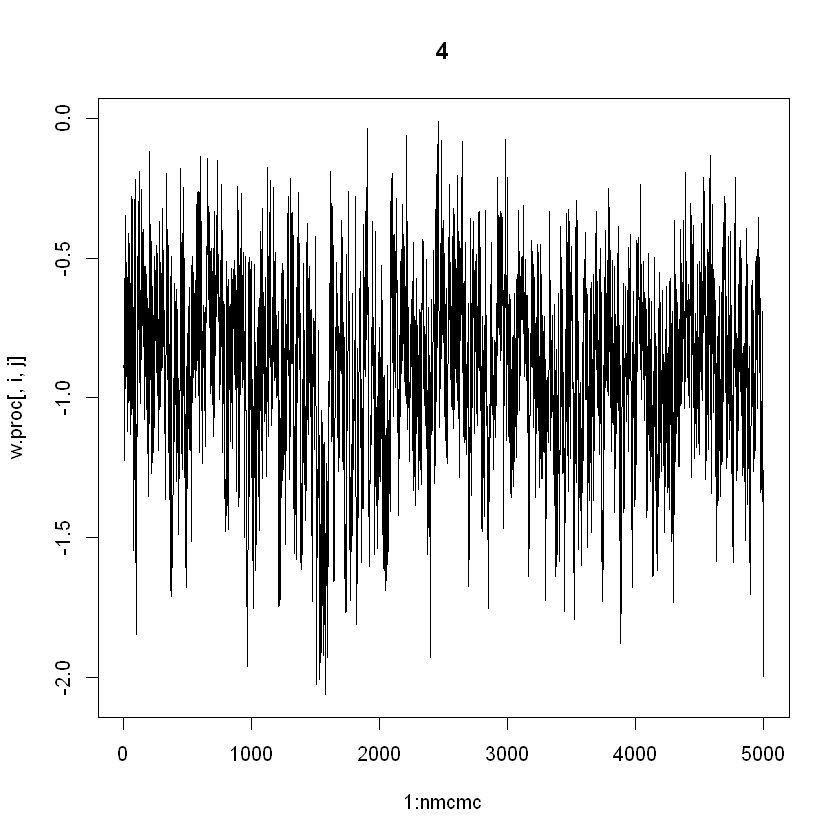

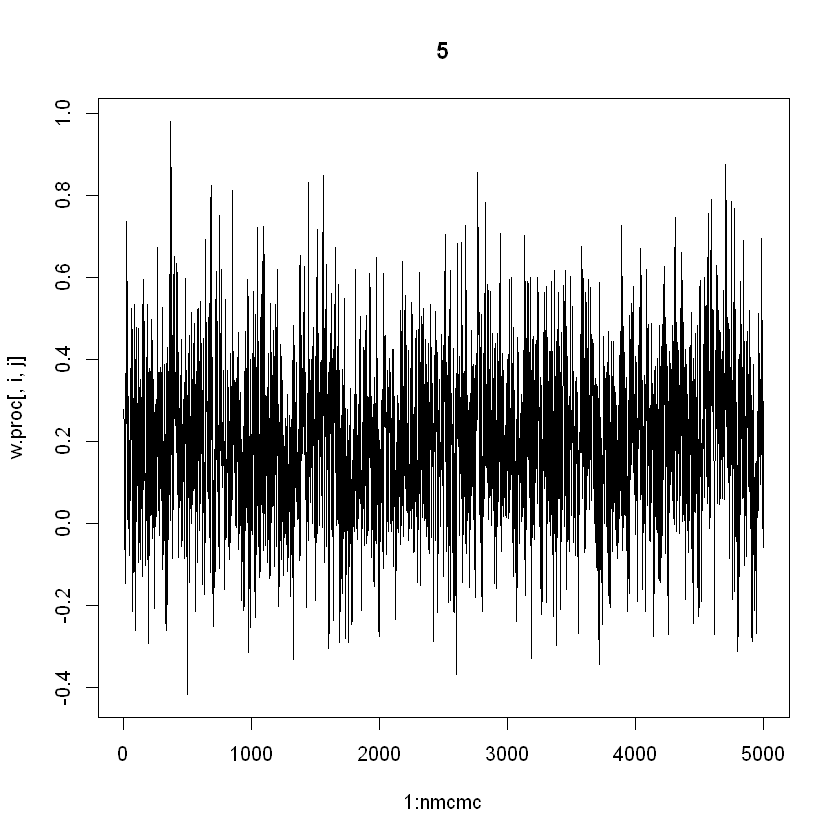

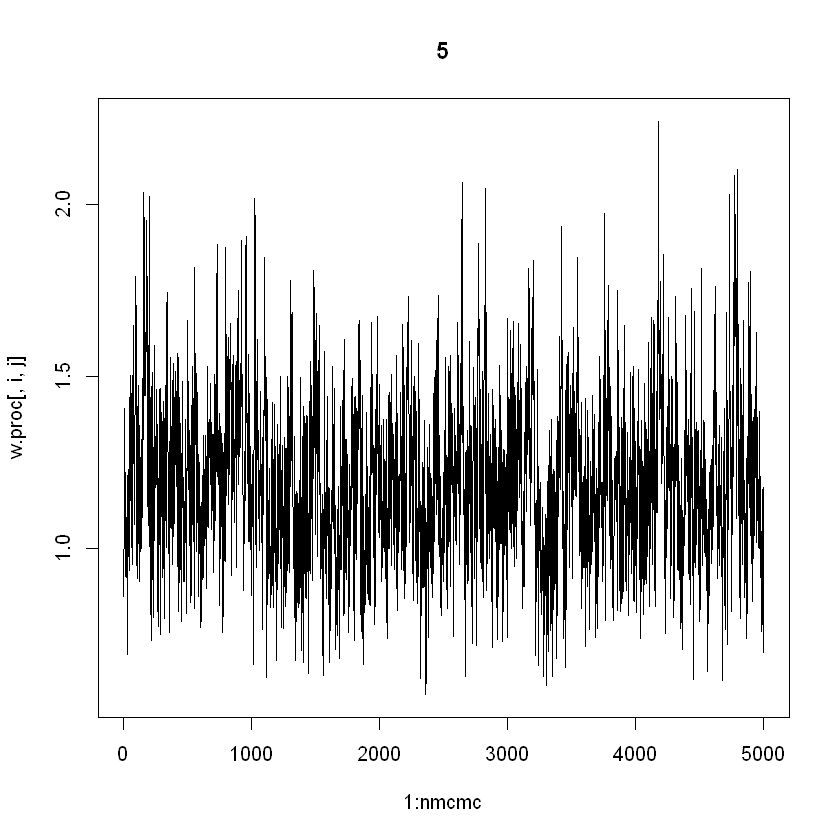

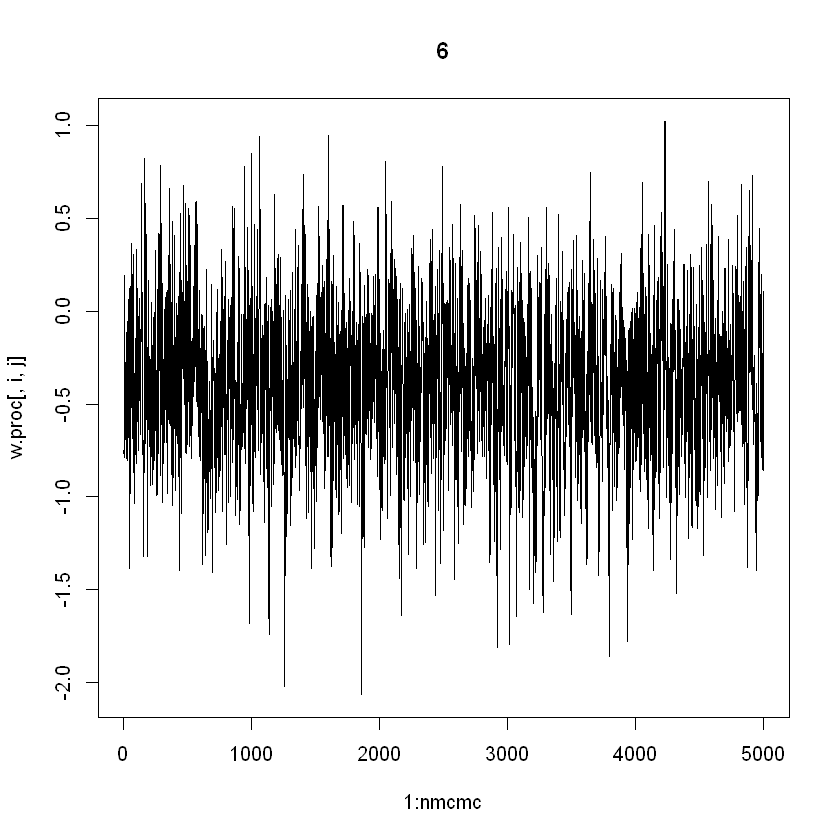

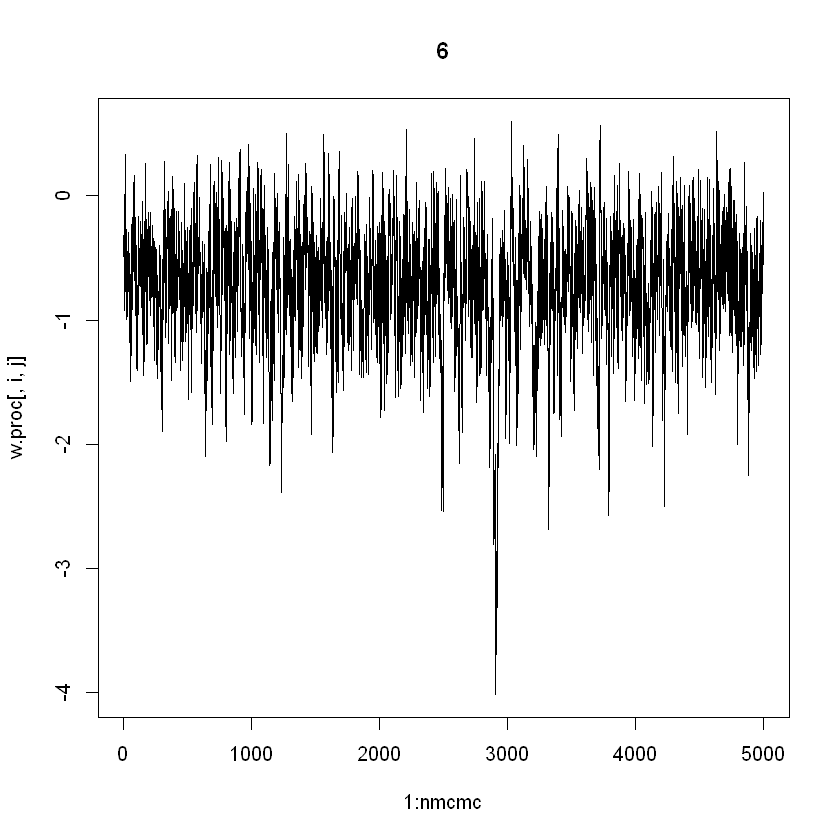

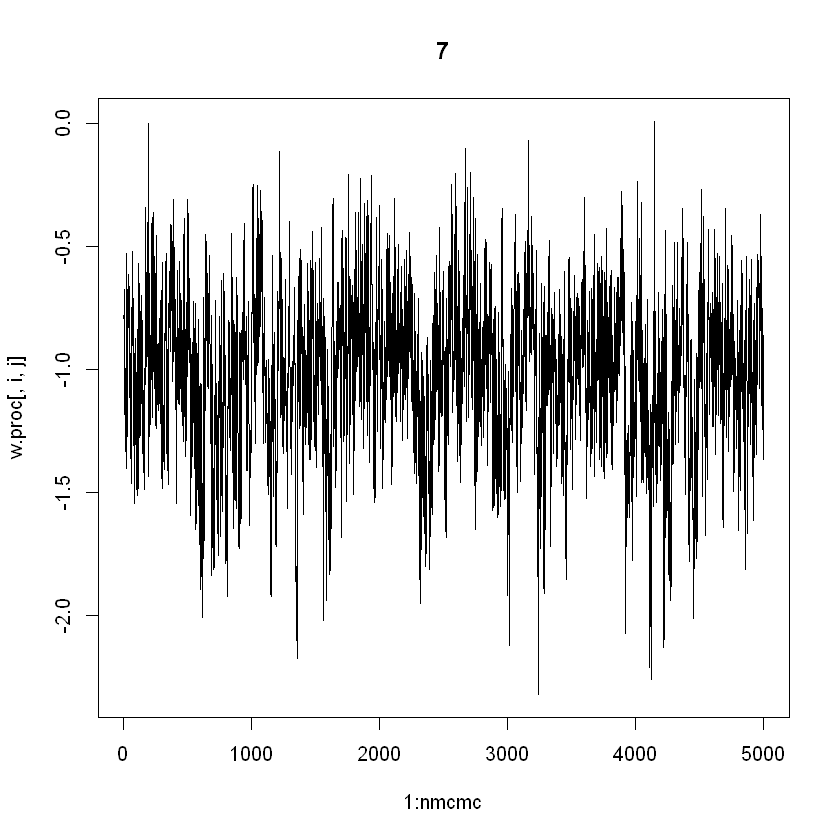

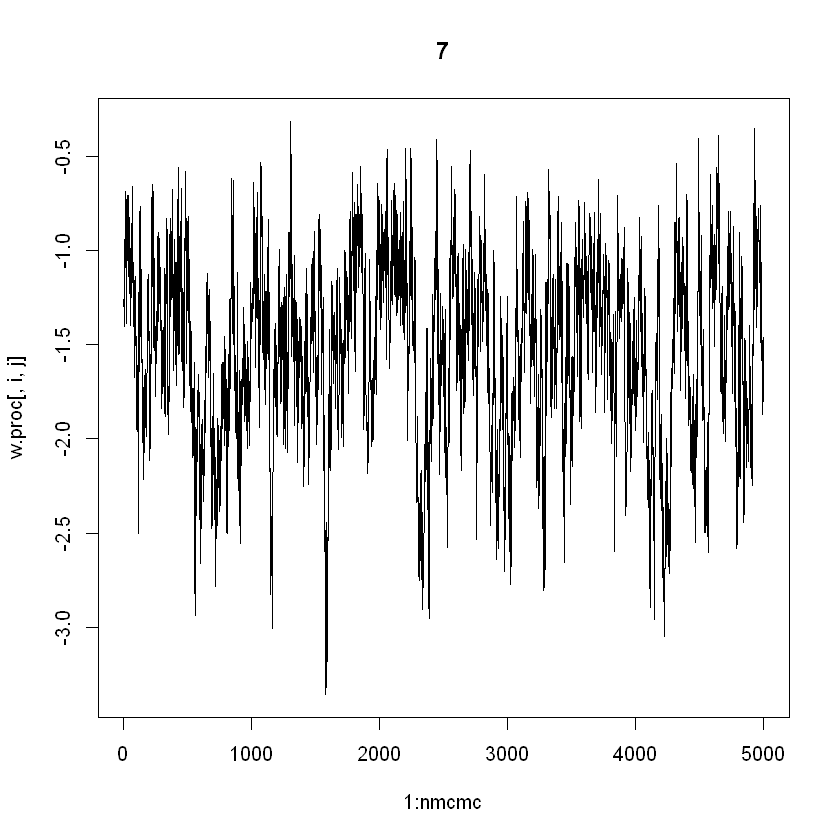

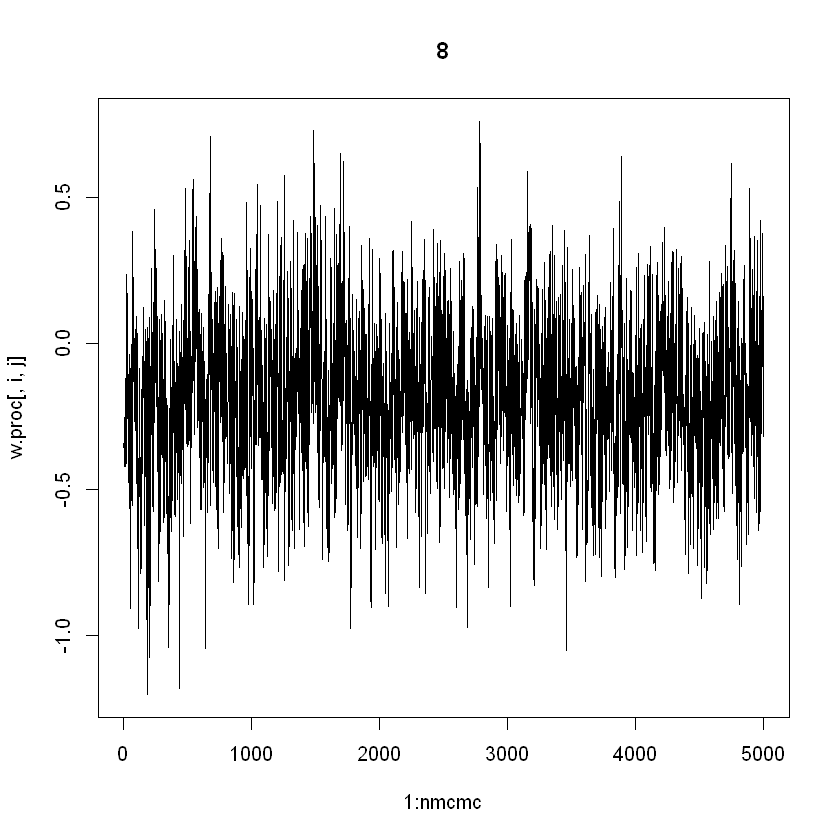

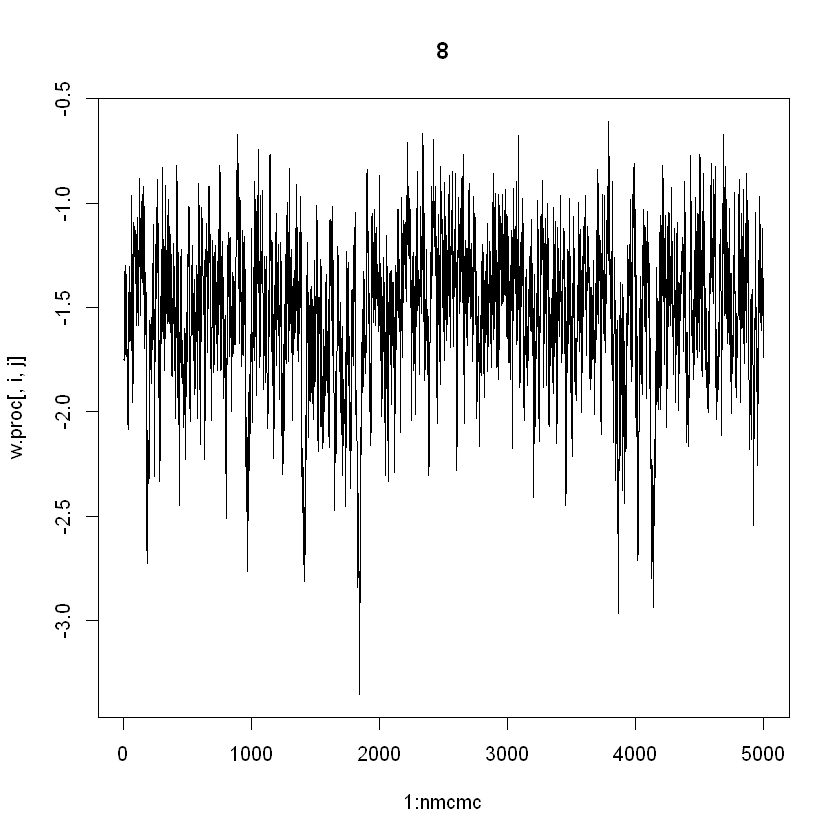

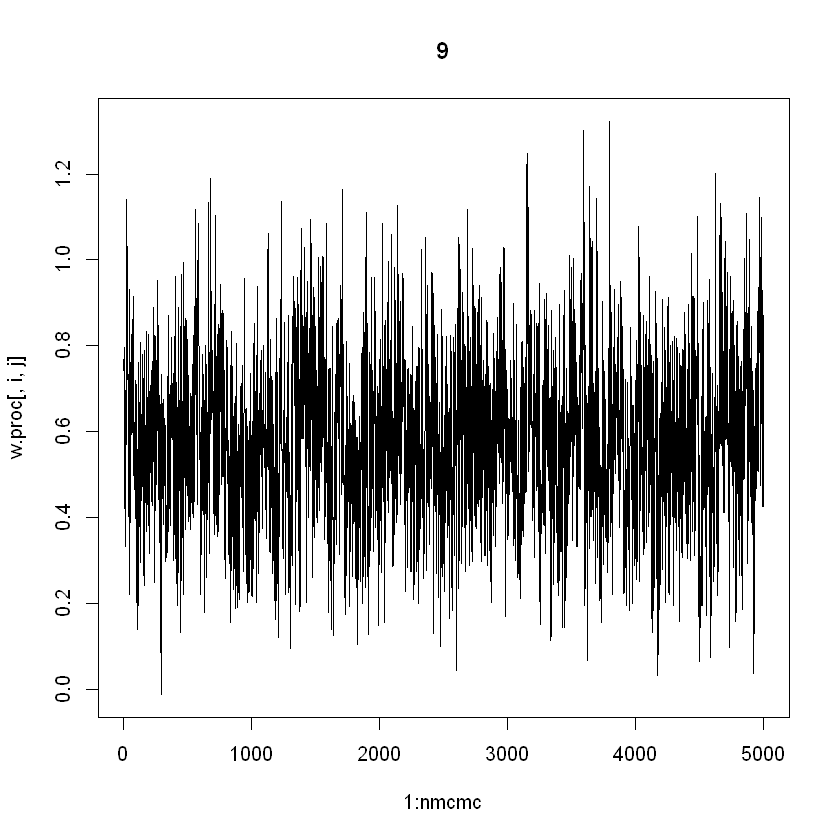

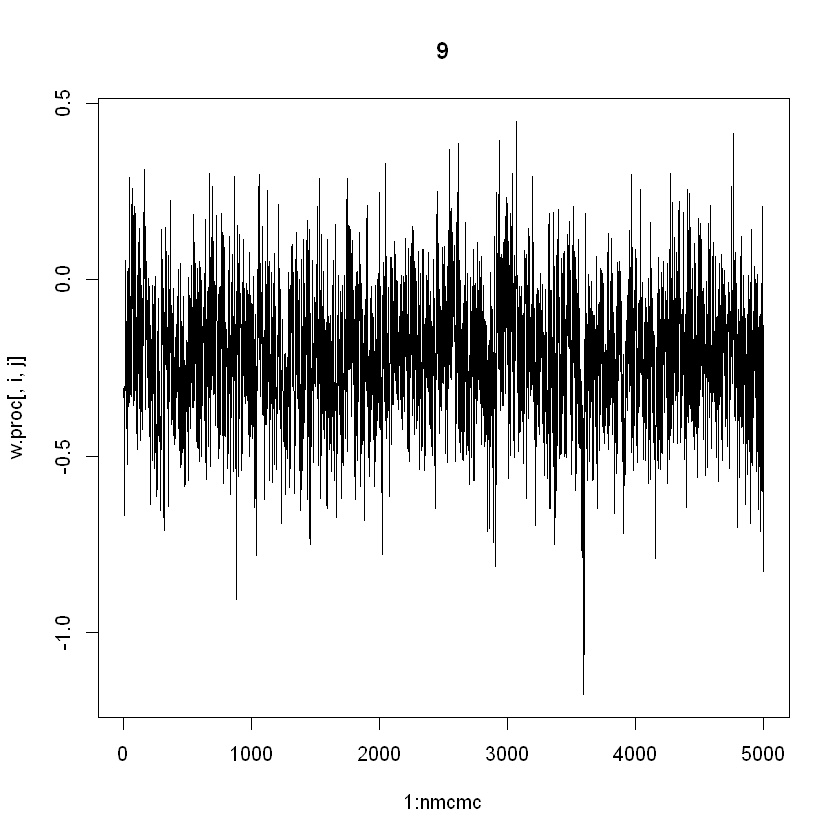

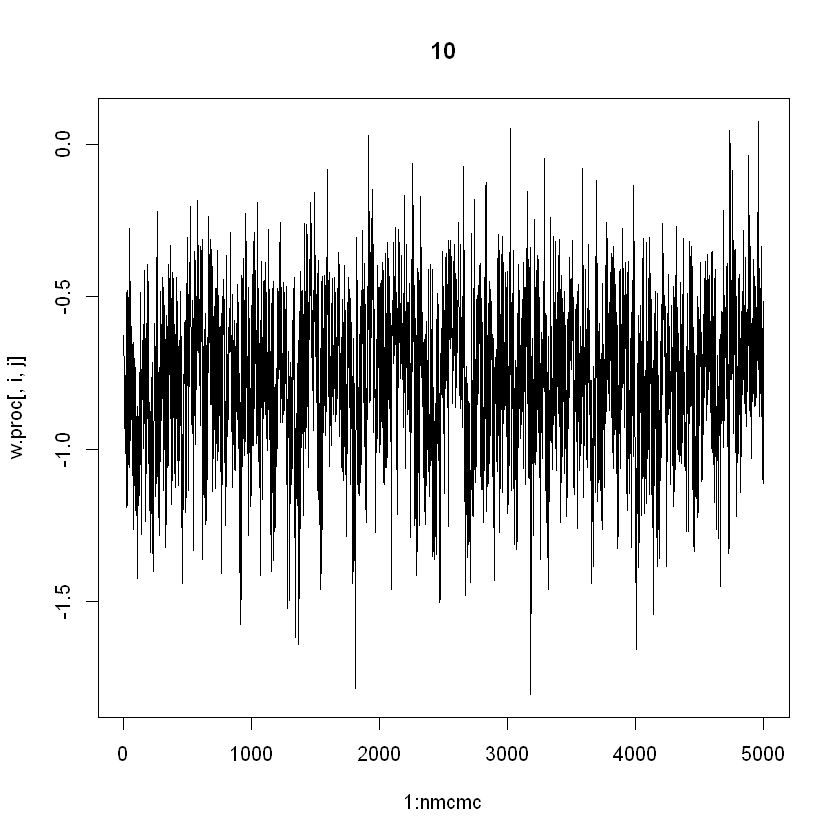

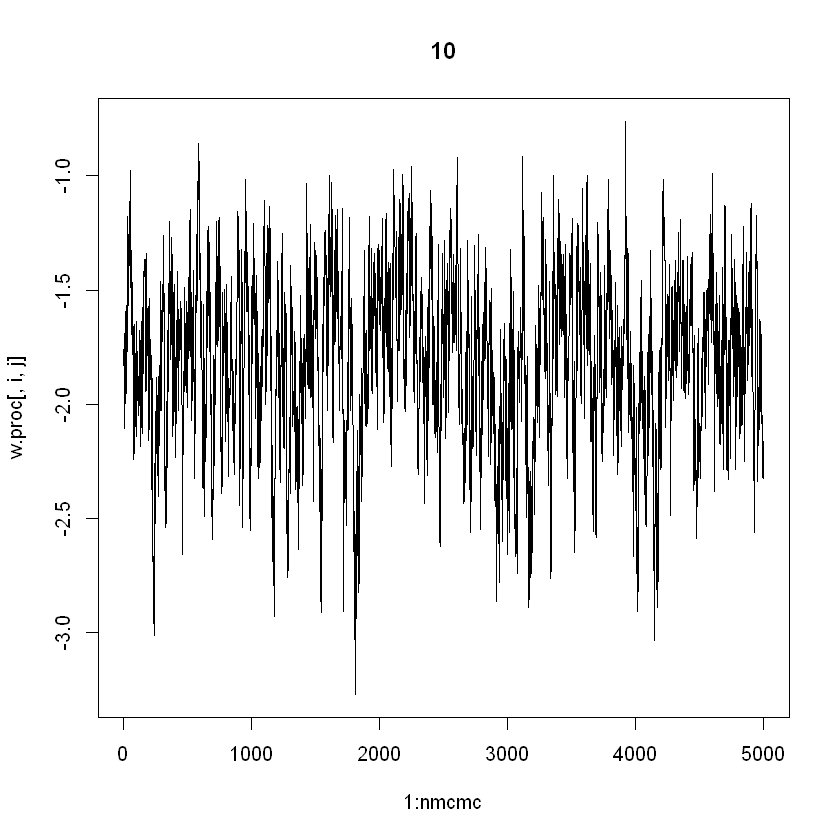

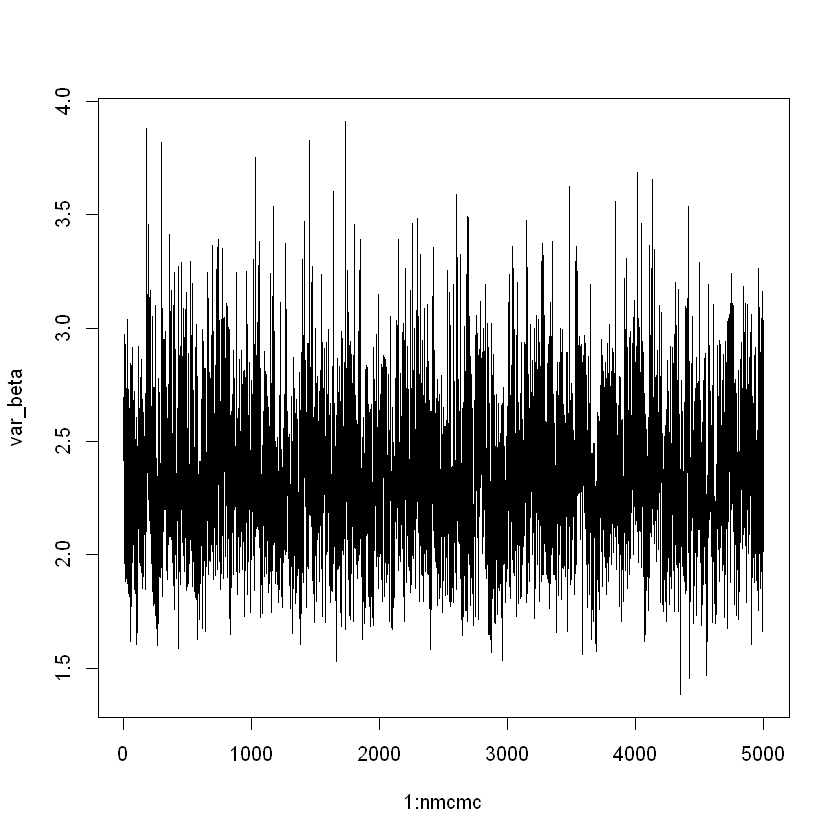

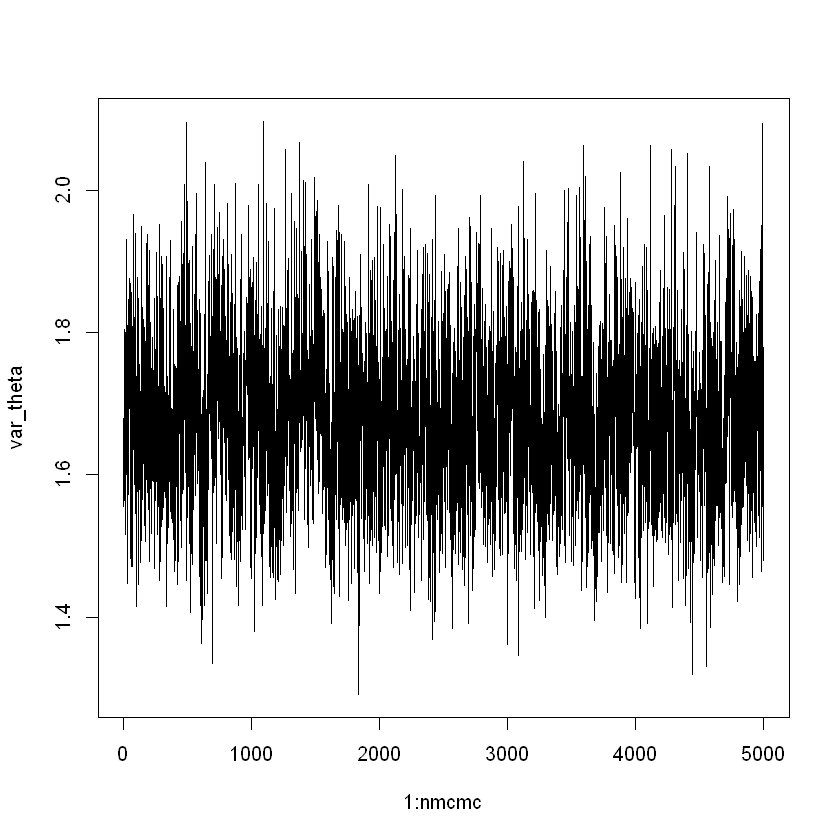

In [5]:
# draw trace plots
#("trace/beta.#")
for(i in 1:min(10,nitem)) plot(1:nmcmc,beta[,i],type="l",main=i)
#.off()
#("trace/theta.#")
for(k in 1:min(10,nsample)) plot(1:nmcmc,theta[,k],type="l",main=k)
#.off()
#("trace/z.#")
for(k in 1:min(10,nsample)) 
  for(j in 1:ndim) plot(1:nmcmc,z.proc[,k,j],type="l",main=k)
#.off()
#("trace/w.#")
for(i in 1:min(10,nitem))
  for(j in 1:ndim) plot(1:nmcmc,w.proc[,i,j],type="l",main=i)
#.off()
#("trace/var_beta.#")
plot(1:nmcmc,var_beta,type="l")
#.off()
#("trace/var_theta.#")
plot(1:nmcmc,var_theta,type="l")
#.off()

In [6]:
# item intercept parameter estimates
beta.est = apply(beta,2,mean)
beta.mcmc = mcmc(beta)
beta.result = matrix(NA,nitem,3)
beta.result[,1] = beta.est
beta.result[,2:3] = HPDinterval(beta.mcmc,prob=0.95)
colnames(beta.result) = c("estimate","lower","upper")
xtable(beta.result,digits=4)

estimate,lower,upper
2.15706565,1.52817818,2.96731105
-1.28394285,-2.17832566,-0.26222629
2.80521975,2.38087807,3.32656459
3.28462586,2.76198120,3.86679004
0.72154491,0.37083381,1.06564226
-2.66377947,-3.24538122,-2.06069243
0.86002840,0.17209830,1.66068702
3.61176333,3.05285383,4.22837650
1.17538147,0.94736695,1.42559216
2.36561252,1.75881655,3.00814065


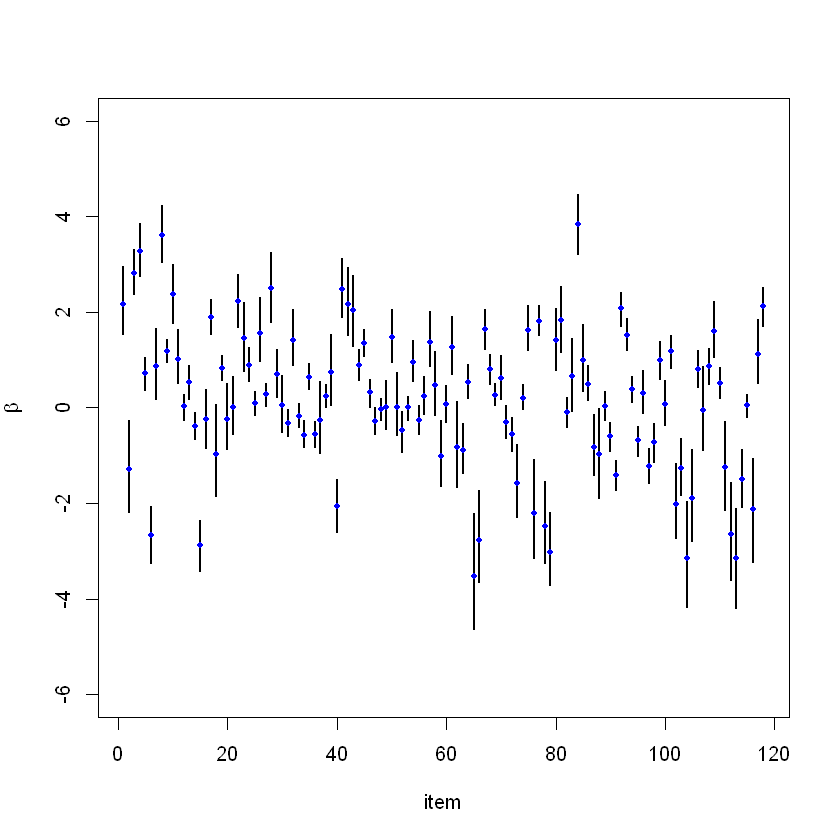

In [7]:
# draw plots for item intercept paramter estimates
x.axis = c(1:nitem)
y.axis = x.axis

#pdf("plot/beta.#pdf")
plot(x.axis,y.axis,ylim=c(-6.0,6.0),xlab="item",ylab=expression(beta),type="n")
for(i in 1:nitem){
  lines(c(i,i),beta.result[i,2:3],lwd=2)
  points(i,beta.result[i,1],pch=20,col=4)
}
#dev.off()


address
    0     1     2     3     4     5     6     7     8     9    10    11    12 
   11     4     8     5     6     8     6     6     8    12    10     9     6 
   13    14    15    16    17    18    19    20    21    22    23    24    25 
   10     8    16     9    11     9    20    10    12    11    11    13     7 
   26    27    28    29    30    31    32    33    34    35    36    37    38 
   13    12    11    12     9    11     3    11     9    10    15    10     9 
   39    40    41    42    43    44    45    46    47    48    49    50    51 
   12    15     9     4     8     9     3    13     7     6     6     6     5 
   52    53    54    55    56    57    58    59    60    61    62    63    64 
    8     4     8     4    10     3     5     4     4     5     3     3     4 
   65    66    67    68    71    72    74    76    77    78    80    81    86 
    4     5     2     1     1     1     2     3     1     1     1     2     1 
   89  1008  1009  1010  1012  1014  1016  1

Warning message in min(temp):
"no non-missing arguments to min; returning Inf"Warning message in max(temp):
"no non-missing arguments to max; returning -Inf"Warning message in min(temp):
"no non-missing arguments to min; returning Inf"Warning message in max(temp):
"no non-missing arguments to max; returning -Inf"Warning message in min(temp):
"no non-missing arguments to min; returning Inf"Warning message in max(temp):
"no non-missing arguments to max; returning -Inf"Warning message in min(temp):
"no non-missing arguments to min; returning Inf"Warning message in max(temp):
"no non-missing arguments to max; returning -Inf"Warning message in min(temp):
"no non-missing arguments to min; returning Inf"Warning message in max(temp):
"no non-missing arguments to max; returning -Inf"Warning message in min(temp):
"no non-missing arguments to min; returning Inf"Warning message in max(temp):
"no non-missing arguments to max; returning -Inf"Warning message in min(temp):
"no non-missing arguments to

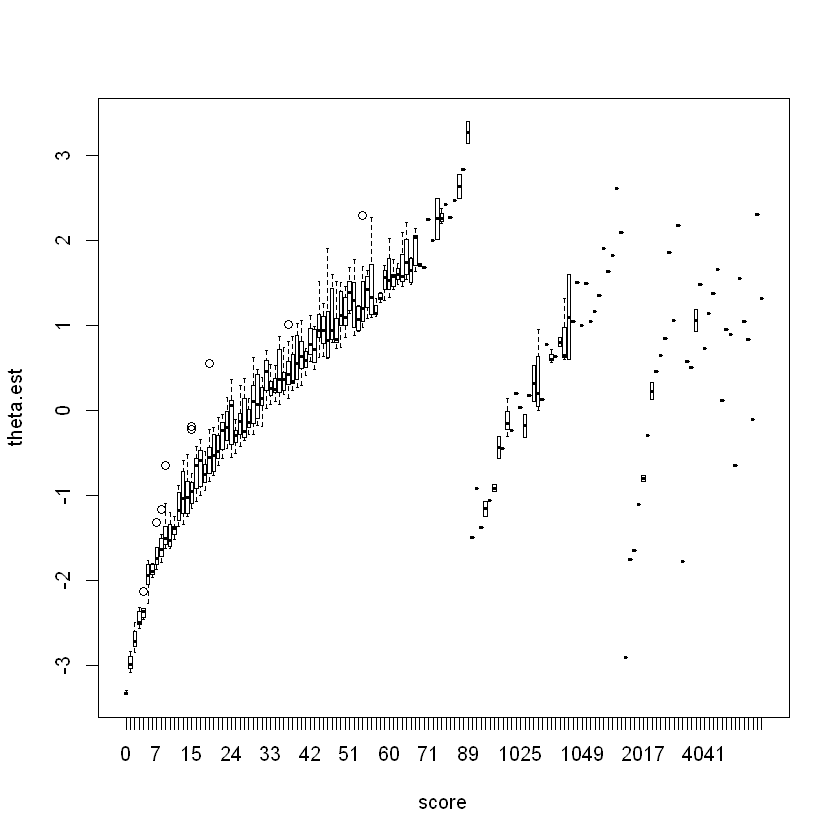

In [9]:
# summarize person intercept parameters by total scores
item = matrix(scan("data/item.txt"),ncol=nitem,byrow=TRUE)
address = apply(item,1,sum)
table(address)
theta.result = matrix(NA,nitem+1,5)
theta.est = apply(theta,2,mean)
for(i in 0:nitem){
  temp = theta.est[address==i]
  theta.result[(i+1),] = c(min(temp),quantile(temp,c(0.25,0.5,0.75)),max(temp))
}

# draw boxplots for person intercept paramter by total scores
score = as.factor(address)
theta.frame = data.frame(theta.est,score)
boxplot(theta.est~score, data=theta.frame)
#pdf("plot/theta.#pdf")
boxplot(theta.est~score, data=theta.frame)
#dev.off()

In [10]:
tic()
# parameter estimates for variance (item intercept, person intercept)
mcmc_var_beta = mcmc(var_beta)
mcmc_var_theta = mcmc(var_theta)
round(c(mean(var_beta),HPDinterval(mcmc_var_beta,0.95)),4)
round(c(mean(var_theta),HPDinterval(mcmc_var_theta,0.95)),4)

# get point estimates of respondent and item latent spaces
w.est = matrix(NA,nitem,ndim)
z.est = matrix(NA,nsample,ndim)
for(i in 1:nitem){
  for(j in 1:ndim){
    w.est[i,j] = mean(w.proc[,i,j])
  }
}
for(k in 1:nsample){
  for(j in 1:ndim){
    z.est[k,j] = mean(z.proc[,k,j])
  }
}
toc()

[1] 2.3488 1.7265 3.0050

[1] 1.6788 1.4654 1.9252

0.3 sec elapsed


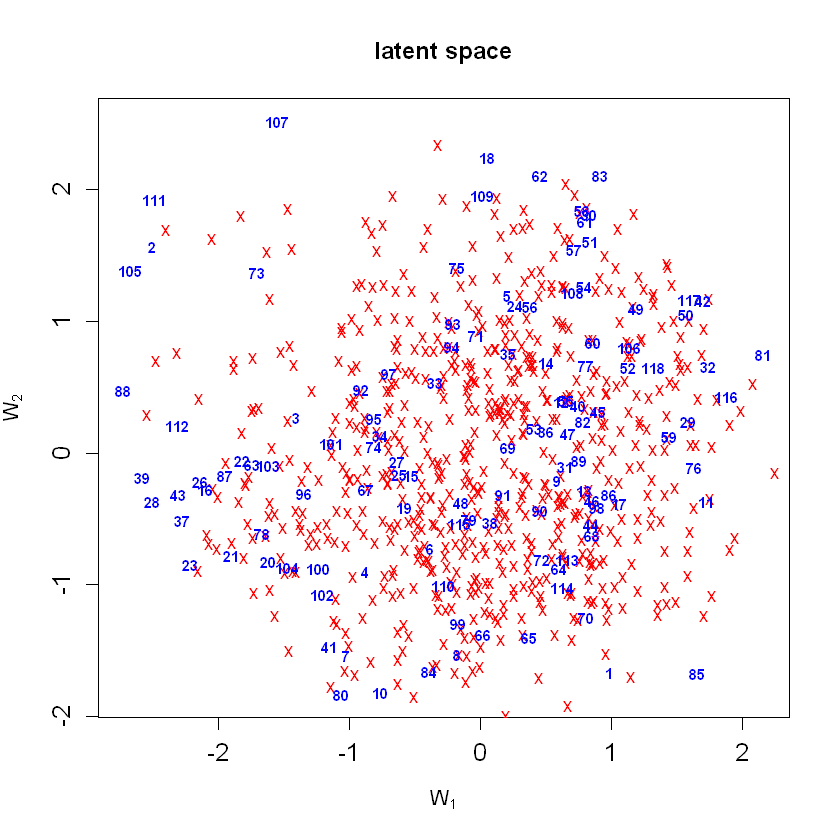

In [11]:
# # plot respondent latent spaces
# plot(z.est[,1],z.est[,2],pch=20,
#      xlab=expression(Z[1]),ylab=expression(Z[2]),
#      main="respondent latent space")

# # plot item latent spaces
# plot(w.est[,1],w.est[,2],cex.axis=1.25,pch="",
#      xlab=expression(W[1]),ylab=expression(W[2]),
#      main="item latent space")
# text(w.est[,1],w.est[,2],labels=1:nitem,cex=0.75,font=2)

# plot item and respondent latent spaces simultaneously
#pdf("plot/latent.#pdf")
plot(w.est[,1],w.est[,2],cex.axis=1.25,pch="",
     xlab=expression(W[1]),ylab=expression(W[2]),
     main="latent space")
points(z.est[,1],z.est[,2],pch="x",col=2)
text(w.est[,1],w.est[,2],labels=1:nitem,cex=0.75,font=2,col=4)
#dev.off()

In [12]:
length(beta.est)
length(theta.est)
dim(w.est)

[1] 118

[1] 662

[1] 118   2

In [13]:
write.csv(w.est,'./west_cbcl.csv',row.names = F,fileEncoding = 'UTF-8')
write.csv(beta.est,'./beta_cbcl.csv',row.names = F,fileEncoding = 'UTF-8')
write.csv(theta.est,'./theta_cbcl.csv',row.names = F,fileEncoding = 'UTF-8')

In [14]:
dim(impute)

[1] 5000  203

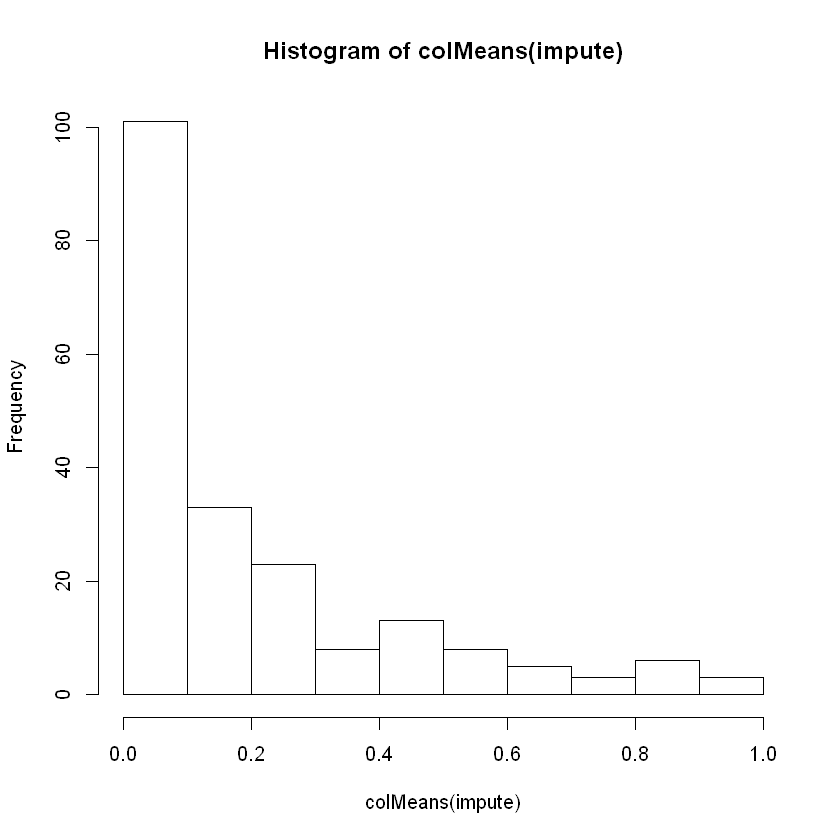

In [15]:
hist(colMeans(impute))